In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph. 

import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# construct labels for columns 
def constructCols(len):
    feature_cols = []
    for i in range(0,len):
        feature_cols.append('Feature{}'.format(i))

    return feature_cols


def distance_from_center(feature1,feature2, label, model):
#   Calculate the Euclidean distance between a data point and the center of its cluster.
    feature1_center =  model.cluster_centers_[label,0]
    feature2_center =  model.cluster_centers_[label,1]
    distance = np.sqrt((feature1 - feature1_center) ** 2 + (feature2 - feature2_center) ** 2)
    return np.round(distance, 3)

# detect outliers abd indexes
def detect_outliers(r_data):
    outliers = []
    outlier_idx = []
    data = sorted(r_data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for idx, i in enumerate(r_data): 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            outlier_idx.append(idx)

    return outliers, outlier_idx

In [3]:
# load the data
greypartridge_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/greypartridge/greypartridge_features.csv')
stockdove_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/stockdove/stockdove_features.csv')
turtledove_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/turtledove/turtledove_features.csv')
yellowhammer_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/yellowhammer/yellowhammer_features.csv')

In [5]:
# label the bird column
turtledove_data['bird'] = 0
greypartridge_data['bird'] = 1
yellowhammer_data['bird'] = 2
stockdove_data['bird'] = 3

# turtledove, greypartridge, yellowhammer, stockdove

bird_df_raw = pd.concat([turtledove_data, greypartridge_data, yellowhammer_data, stockdove_data]).reset_index(drop=True)

bird_df = bird_df_raw.drop(columns=['Unnamed: 0', 'bird', 'clip'])


In [6]:
bird_df.describe().T

count      mean       std  min       25%       50%  \
zcr_mean                4000.0  0.091769  0.080141  0.0  0.027957  0.069213   
energy_mean             4000.0  0.025225  0.020509  0.0  0.008869  0.019994   
energy_entropy_mean     4000.0  2.977298  0.204193  0.0  2.810897  3.011240   
spectral_centroid_mean  4000.0  0.167472  0.076397  0.0  0.107946  0.148718   
spectral_spread_mean    4000.0  0.187509  0.041473  0.0  0.154301  0.185886   
...                        ...       ...       ...  ...       ...       ...   
delta chroma_9_std      4000.0  0.005924  0.006775  0.0  0.001475  0.003488   
delta chroma_10_std     4000.0  0.008565  0.009337  0.0  0.002591  0.005243   
delta chroma_11_std     4000.0  0.016833  0.013740  0.0  0.006606  0.012775   
delta chroma_12_std     4000.0  0.007191  0.009720  0.0  0.001298  0.003696   
delta chroma_std_std    4000.0  0.013388  0.009542  0.0  0.005250  0.010191   

                             75%       max  
zcr_mean                0.131529  0.600757  
energy_mean             0.037150  0.146312  
energy_entropy_mean     3.139923  3.308648  
spectral_centroid_mean  0.209444  0.533820  
spectral_spread_mean    0.214544  0.331338  
...                          ...       ...  
delta chroma_9_std      0.007553  0.049211  
delta chroma_10_std     0.010606  0.071783  
delta chroma_11_std     0.023401  0.126624  
delta chroma_12_std     0.008498  0.080783  
delta chroma_std_std    0.022374  0.043129  

[136 rows x 8 columns]

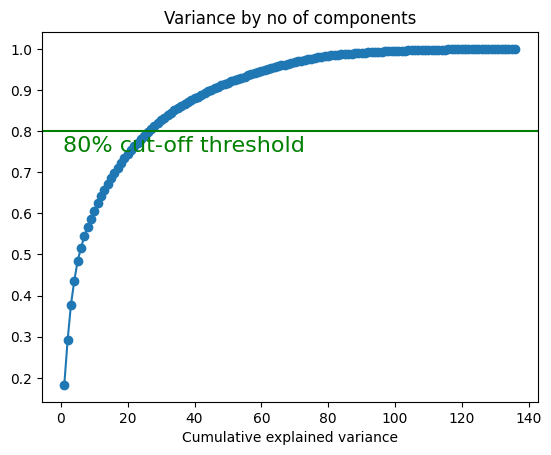

shape of pca (4000, 27)


In [7]:

from sklearn.decomposition import PCA

df_0 = bird_df.copy()

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(df_0)

pca = PCA(0.8)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

pca = PCA(n_components=len(df_0.columns))
pca.fit_transform(data_rescaled)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')

plt.title('Variance by no of components')
plt.xlabel('No of components')
plt.xlabel('Cumulative explained variance')

plt.axhline(y=0.80, color='g', linestyle='-')
plt.text(0.5, 0.75, '80% cut-off threshold', color = 'green', fontsize=16)

plt.show()

print('shape of pca {}'.format(reduced.shape))

In [8]:
pca.explained_variance_ratio_.cumsum()

array([0.18269598, 0.29138388, 0.37777733, 0.43652864, 0.48382382,
       0.51574708, 0.54440826, 0.56597965, 0.58629845, 0.60546186,
       0.62412948, 0.64169812, 0.6576554 , 0.6724115 , 0.68570838,
       0.6983945 , 0.71080842, 0.72283376, 0.73412421, 0.74415146,
       0.75361754, 0.76287993, 0.77176956, 0.78060985, 0.78881183,
       0.79678798, 0.80450269, 0.81192924, 0.81907457, 0.82614928,
       0.83272675, 0.83884513, 0.84477616, 0.85031783, 0.85578328,
       0.86102098, 0.86591883, 0.87075263, 0.87542598, 0.87991898,
       0.88422795, 0.88841788, 0.89251597, 0.89648291, 0.90035947,
       0.90410821, 0.90774138, 0.91129055, 0.91480519, 0.91792705,
       0.92102377, 0.92401963, 0.9269737 , 0.92984511, 0.9326858 ,
       0.93545557, 0.93814956, 0.94078983, 0.94335296, 0.94589402,
       0.94840861, 0.95081694, 0.95319121, 0.95543594, 0.95764396,
       0.95980938, 0.96196279, 0.96405662, 0.96607424, 0.96800341,
       0.96980283, 0.97151413, 0.97315086, 0.97473226, 0.97626

In [9]:
# final_df = pd.DataFrame(reduced, columns=constructCols(len(reduced[0])))

# df_2 = final_df.copy()

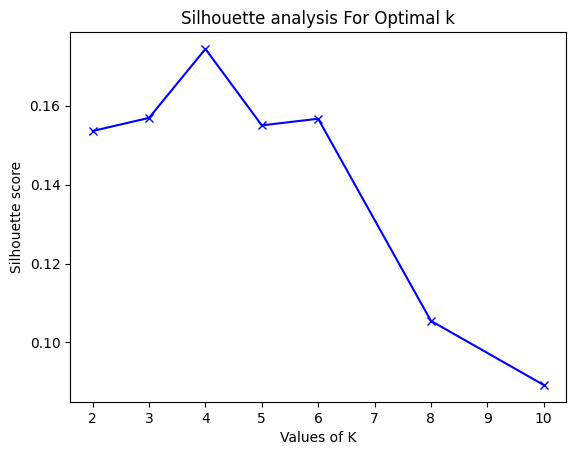

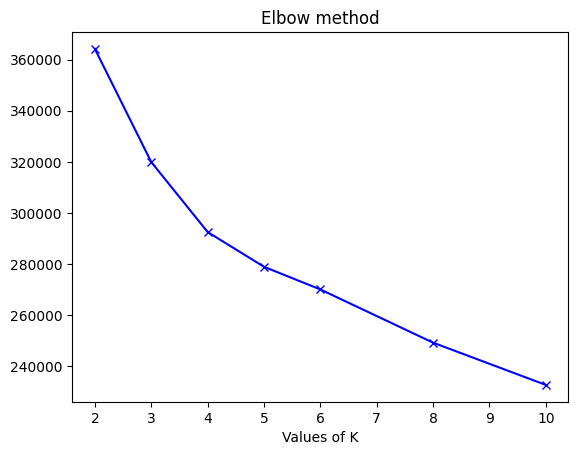

In [10]:
pca_features = 27

range_n_clusters = [2, 3, 4, 5, 6, 8 , 10]
silhouette_avg = []
wcss = []


df_1 = bird_df.copy()

scaler = StandardScaler()
df_1 = scaler.fit_transform(df_1)

pca_mod = PCA(n_components=pca_features, random_state=143)

pca_mod.fit(df_1)
mod_t = pca_mod.transform(df_1)


for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(mod_t)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_1, cluster_labels))
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# elbow method
plt.plot(range_n_clusters, wcss, 'bx-') 
plt.xlabel('Values of K') 
plt.title('Elbow method')
plt.show()

0    1358
2    1253
1     760
3     629
Name: cluster_label, dtype: int64


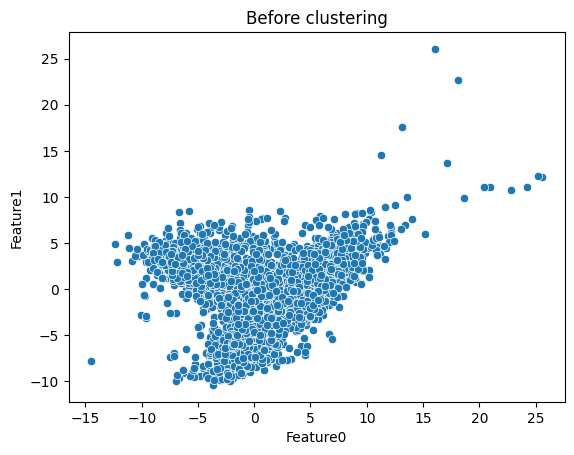

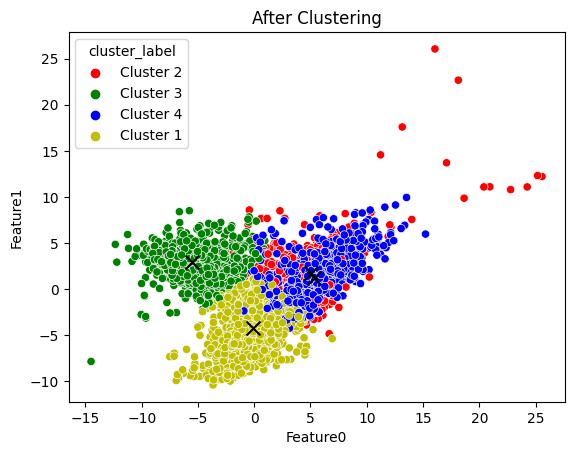

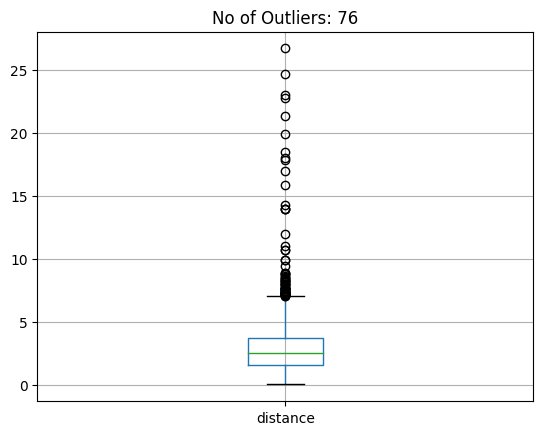

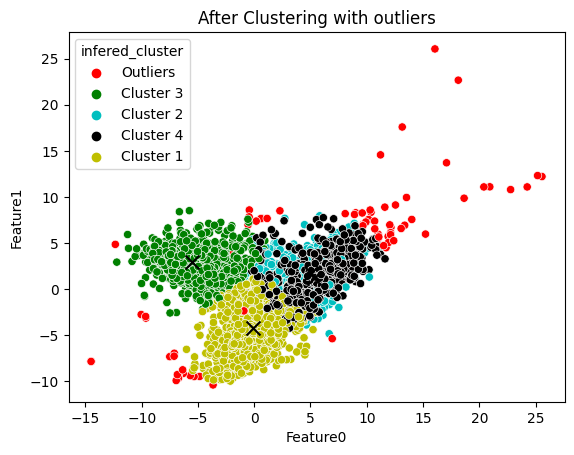

In [11]:
# we can consider no of classes as 4

mod_df = bird_df.copy()

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(mod_df)

mod_df = pd.DataFrame(data_rescaled, columns=mod_df.columns)

pca_mod = PCA(n_components=pca_features)

pca_mod.fit(mod_df)
mod_t = pca_mod.transform(mod_df)

k_mod = KMeans(n_clusters=4, n_init = 10, init='k-means++', random_state=42)

classes = k_mod.fit_predict(mod_t)

final_df = pd.concat([mod_df.reset_index(drop=True), pd.DataFrame(mod_t, columns=constructCols(pca_features))], axis=1)
final_df['cluster_label'] = k_mod.labels_
final_df['distance'] = distance_from_center(final_df['Feature0'], final_df['Feature1'], final_df['cluster_label'], k_mod)
centroids = np.array(k_mod.cluster_centers_)

print(final_df['cluster_label'].value_counts())

outliers, all_outlier_idx = detect_outliers(final_df['distance'])
outliers_idx = list(final_df.sort_values('distance', ascending=False).head(len(all_outlier_idx)).index)

no_of_outliers = len(outliers_idx)

final_df['infered_cluster'] = k_mod.labels_
final_df['bird'] = bird_df_raw['bird']

final_df.loc[outliers_idx, ['infered_cluster']] = 4

outliers_df = final_df[final_df.index.isin(outliers_idx)]

final_df['cluster_label'] = final_df['cluster_label'].replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'})
final_df['infered_cluster'] = final_df['infered_cluster'].replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4: 'Outliers'})
final_df['bird'] = bird_df_raw['bird'].replace({0:'turtledove', 1:'greypartridge', 2:'yellowhammer', 3:'stockdove'})

plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1') # ,palette=['r','g','b','y'])
plt.title('Before clustering')
plt.show()

# plot 2D scatter plot to cluster
plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1', hue="cluster_label", palette=['r','g','b','y'])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
plt.title('After Clustering')
plt.show()


plt.figure()
final_df.boxplot(column=['distance'])
plt.title('No of Outliers: {}'.format(len(all_outlier_idx))) 
plt.suptitle('') # that's what you're after
plt.show()
                

# plot 2D scatter plot to cluster
plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1', hue="infered_cluster", palette=['r','g','c','k','y'])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
plt.title('After Clustering with outliers')
plt.show()
                                  

                                                               
fig = px.scatter_3d(final_df, x='Feature0', y='Feature1', z='Feature2',color='infered_cluster', color_discrete_sequence=['red','green', 'cyan','black','yellow'])
fig.show()


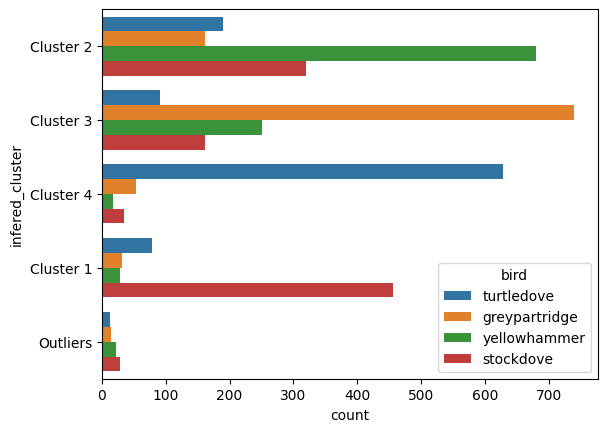

In [36]:
plt.figure()
sns.countplot(data=final_df, y='infered_cluster',  hue='bird', hue_order = ['turtledove','greypartridge','yellowhammer','stockdove'] , order = final_df['infered_cluster'].value_counts().index) 
plt.show()

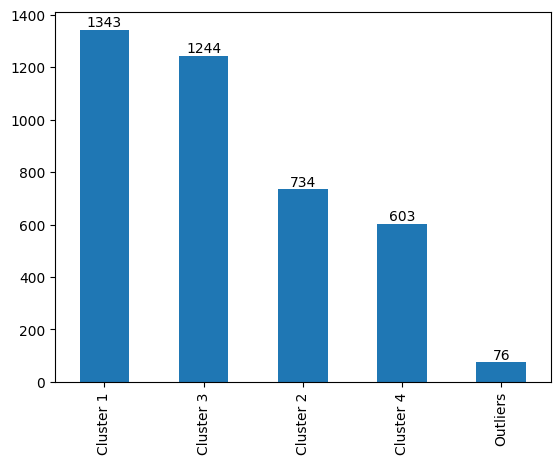

In [70]:
ax = final_df['infered_cluster'].value_counts().plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container)
    



In [39]:

',   '.join(final_df.columns)

'zcr_mean,   energy_mean,   energy_entropy_mean,   spectral_centroid_mean,   spectral_spread_mean,   spectral_entropy_mean,   spectral_flux_mean,   spectral_rolloff_mean,   mfcc_1_mean,   mfcc_2_mean,   mfcc_3_mean,   mfcc_4_mean,   mfcc_5_mean,   mfcc_6_mean,   mfcc_7_mean,   mfcc_8_mean,   mfcc_9_mean,   mfcc_10_mean,   mfcc_11_mean,   mfcc_12_mean,   mfcc_13_mean,   chroma_1_mean,   chroma_2_mean,   chroma_3_mean,   chroma_4_mean,   chroma_5_mean,   chroma_6_mean,   chroma_7_mean,   chroma_8_mean,   chroma_9_mean,   chroma_10_mean,   chroma_11_mean,   chroma_12_mean,   chroma_std_mean,   delta zcr_mean,   delta energy_mean,   delta energy_entropy_mean,   delta spectral_centroid_mean,   delta spectral_spread_mean,   delta spectral_entropy_mean,   delta spectral_flux_mean,   delta spectral_rolloff_mean,   delta mfcc_1_mean,   delta mfcc_2_mean,   delta mfcc_3_mean,   delta mfcc_4_mean,   delta mfcc_5_mean,   delta mfcc_6_mean,   delta mfcc_7_mean,   delta mfcc_8_mean,   delta mfcc_9_m

In [23]:
# since we determined 4 clusters


In [24]:
# bird_df.boxplot(column=[ 'zcr_mean'])





In [25]:
# for i in range(0,4):
#     temp_df = final_df[final_df.cluster_label == i ]
#     print(temp_df)
#     no_of_outlier = detect_outliers_iqr(temp_df['distance'])
#     temp_df.boxplot(column=['distance'])
#     print(no_of_outlier)
#     if no_of_outlier > 0:
#          outliers_idx.extend(list(temp_df.sort_values('distance', ascending=False).head(no_of_outlier).index))


In [26]:
# # dbscan method

# df_3 = bird_df.copy()

# mod_df = df_3.drop(columns=['Unnamed: 0', 'bird', 'clip'])

# scaler = StandardScaler()
# X = scaler.fit_transform(mod_df)

# mod_df = pd.DataFrame(X, columns=mod_df.columns)

# pca_mod = PCA(n_components=27)

# pca_mod.fit(mod_df)
# mod_t = pca_mod.transform(mod_df)

# mod_t = pd.DataFrame(mod_t, columns=constructCols(27))

# # Apply DBSCAN clustering
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps= 7.2, min_samples=5)
# mod_t['labels'] = dbscan.fit_predict(mod_t)

# mod_t[mod_t['labels'] == -1 ] = 4

# mod_t['labels'] = mod_t['labels'].replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4: 'Outliers'})


# # # Visualize clustering results
# plt.figure()
# sns.scatterplot(data = mod_t, x='Feature0', y='Feature1', hue="labels", palette=['r','g','c','k','y'])
# # plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
# plt.title('After Clustering with outliers')
# plt.show()

# fig = px.scatter_3d(mod_t, x='Feature0', y='Feature1', z='Feature2',color='labels', color_discrete_sequence=['red','green', 'cyan','black','yellow'])
# fig.show()


# # Evaluate clustering results
# # from sklearn.metrics import silhouette_score
# # score = silhouette_score(X, dbscan.labels_)
# # print("Silhouette score:", score)
# set(dbscan.labels_.tolist())



In [27]:
# from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=2)
# nbrs = neigh.fit(mod_df)
# distances, indices = nbrs.kneighbors(mod_df)


# # Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.figure(figsize=(20,10))
# plt.plot(distances)
# plt.title('K-distance Graph',fontsize=20)
# plt.xlabel('Data Points sorted by distance',fontsize=14)
# plt.ylabel('Epsilon',fontsize=14)
# plt.show()

In [28]:

# def strip_clip_label(s):
#     return s.split('-')[2].split('_')[0]

# bird_df['clip'] = bird_df['clip'].apply(strip_clip_label)


In [12]:
                                                               
fig = px.scatter_3d(final_df, x='Feature0', y='Feature1', z='Feature2',color='infered_cluster', color_discrete_sequence=['red','green', 'cyan','black','yellow'])
fig.show()

yellowhammer     680
stockdove        318
turtledove       187
greypartridge    158
Name: bird, dtype: int64


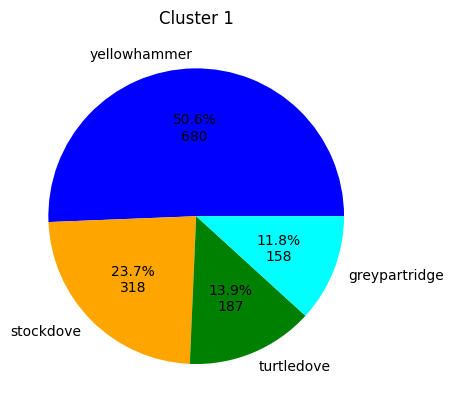

In [65]:
# plt.pie(final_df['bird'].value_counts().values)

final_CL1  = final_df[final_df['infered_cluster'] == 'Cluster 1']

total = final_CL1['bird'].value_counts().values.sum()


def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)


print(final_CL1['bird'].value_counts())

plt.pie(final_CL1['bird'].value_counts().values, labels=['yellowhammer','stockdove', 'turtledove', 'greypartridge'], autopct=fmt, colors=[ 'blue', 'orange', 'green', 'cyan']);
plt.title("Cluster 1")
plt.show()


                                                                                    # stockdove        'orange'
                                                                                    # turtledove        'green'
                                                                                    # greypartridge     'cyan'
                                                                                    # yellowhammer      'blue'

turtledove       628
greypartridge     54
stockdove         34
yellowhammer      18
Name: bird, dtype: int64


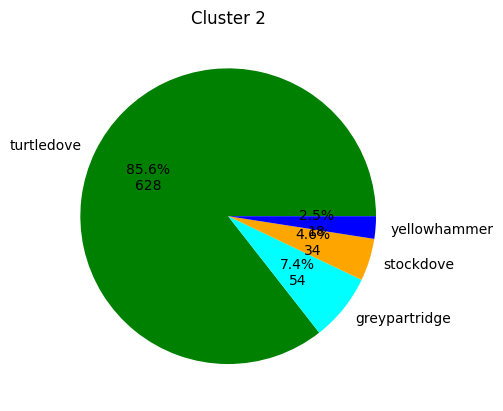

In [64]:
# plt.pie(final_df['bird'].value_counts().values)

final_CL1  = final_df[final_df['infered_cluster'] == 'Cluster 2']

total = final_CL1['bird'].value_counts().values.sum()


def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)


print(final_CL1['bird'].value_counts())

plt.pie(final_CL1['bird'].value_counts().values, labels=['turtledove', 'greypartridge','stockdove', 'yellowhammer'], autopct=fmt, colors=['green', 'cyan','orange', 'blue']);
plt.title("Cluster 2")
plt.show()


                                                                                            # stockdove        'orange'
                                                                                            # turtledove        'green'
                                                                                            # greypartridge     'cyan'
                                                                                            # yellowhammer      'blue'

greypartridge    740
yellowhammer     251
stockdove        162
turtledove        91
Name: bird, dtype: int64


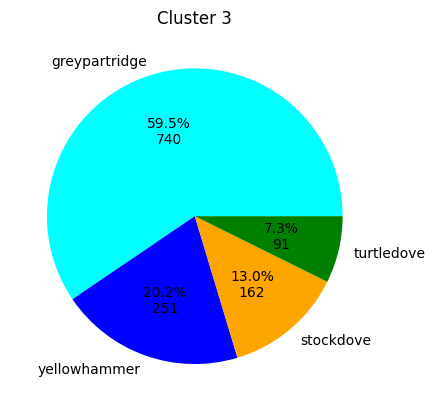

In [67]:
# plt.pie(final_df['bird'].value_counts().values)

final_CL1  = final_df[final_df['infered_cluster'] == 'Cluster 3']

total = final_CL1['bird'].value_counts().values.sum()


def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)


print(final_CL1['bird'].value_counts())

plt.pie(final_CL1['bird'].value_counts().values, labels=['greypartridge','yellowhammer', 'stockdove', 'turtledove'], autopct=fmt, colors=['cyan', 'blue', 'orange', 'green']);
plt.title("Cluster 3")
plt.show()


                                                                                            # stockdove        'orange'
                                                                                            # turtledove        'green'
                                                                                            # greypartridge     'cyan'
                                                                                            # yellowhammer      'blue'

stockdove        458
turtledove        82
greypartridge     33
yellowhammer      30
Name: bird, dtype: int64


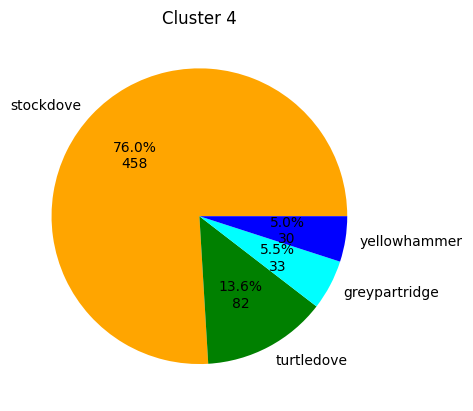

In [83]:
# plt.pie(final_df['bird'].value_counts().values)

final_CL1  = final_df[final_df['infered_cluster'] == 'Cluster 4']

total = final_CL1['bird'].value_counts().values.sum()


def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)


print(final_CL1['bird'].value_counts())

plt.pie(final_CL1['bird'].value_counts().values, labels=[ 'stockdove', 'turtledove', 'greypartridge','yellowhammer'], autopct=fmt, colors=['orange', 'green', 'cyan', 'blue']);
plt.title("Cluster 4")
plt.show()





    
                                                                                            # stockdove        'orange'
                                                                                            # turtledove        'green'
                                                                                            # greypartridge     'cyan'
                                                                                            # yellowhammer      'blue'

stockdove        28
yellowhammer     21
greypartridge    15
turtledove       12
Name: bird, dtype: int64


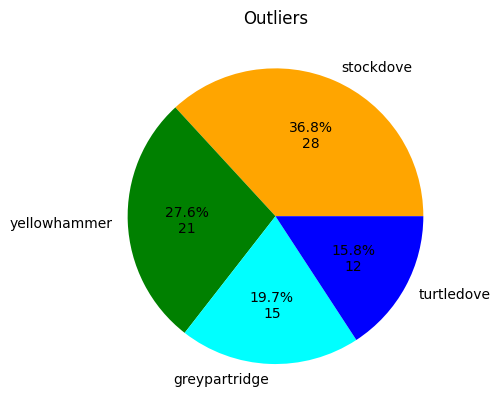

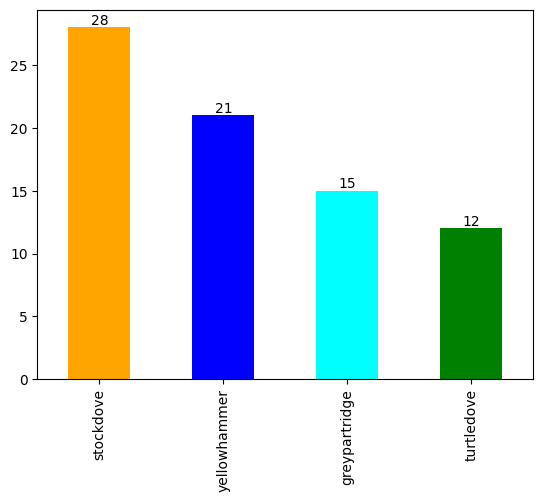

In [90]:

# plt.pie(final_df['bird'].value_counts().values)

outliers_df_2  = final_df[final_df['infered_cluster'] == 'Outliers']

total = outliers_df_2['bird'].value_counts().values.sum()


def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)


print(outliers_df_2['bird'].value_counts())

plt.pie(outliers_df_2['bird'].value_counts().values, labels=[ 'stockdove', 'yellowhammer', 'greypartridge','turtledove'], autopct=fmt, colors=['orange', 'green', 'cyan', 'blue']);
plt.title("Outliers")
plt.show()

ax = outliers_df_2['bird'].value_counts().plot(kind="bar", color=['orange', 'blue', 'cyan', 'green'])

for container in ax.containers:
    ax.bar_label(container)
    
                                                                                            # stockdove        'orange'
                                                                                            # turtledove        'green'
                                                                                            # greypartridge     'cyan'
                                                                                            # yellowhammer      'blue'

In [98]:
cl1 = final_df[final_df['infered_cluster'] == 'Cluster 1']['energy_mean'].describe()
cl1


count    1343.000000
mean       -0.608156
std         0.569027
min        -1.223107
25%        -1.045302
50%        -0.768928
75%        -0.342737
max         2.839066
Name: energy_mean, dtype: float64

In [100]:
cl2 = final_df[final_df['infered_cluster'] == 'Cluster 2']['energy_mean'].describe()
cl2

count    734.000000
mean       0.001865
std        0.714277
min       -1.184119
25%       -0.573725
50%       -0.091763
75%        0.505447
max        2.417441
Name: energy_mean, dtype: float64

In [102]:
cl3 = final_df[final_df['infered_cluster'] == 'Cluster 3']['energy_mean'].describe()
cl3

count    1244.000000
mean        0.598583
std         1.208280
min        -1.227431
25%        -0.482990
50%         0.480804
75%         1.510325
max         5.904849
Name: energy_mean, dtype: float64

In [104]:
cl4 = final_df[final_df['infered_cluster'] == 'Cluster 4']['energy_mean'].describe()
cl4

count    603.000000
mean       0.118780
std        0.753153
min       -1.214451
25%       -0.460552
50%        0.029270
75%        0.658998
max        2.347459
Name: energy_mean, dtype: float64

[0.9703843156056269, -0.14183382683112816, -0.7820054147036312, -0.40013992346250005, 0.19709214177494302]


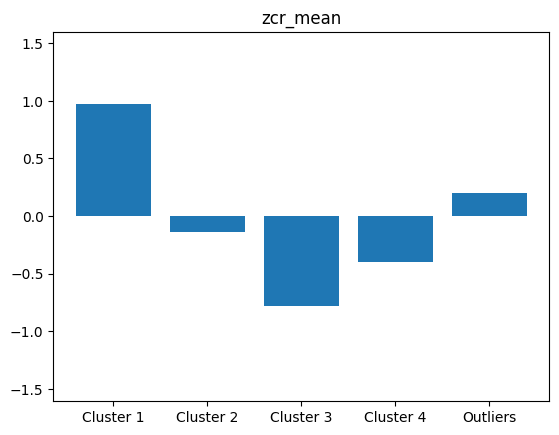

[-0.6081559106208841, 0.001864533277338454, 0.5985829806410361, 0.1187798528152378, -0.011534981930998322]


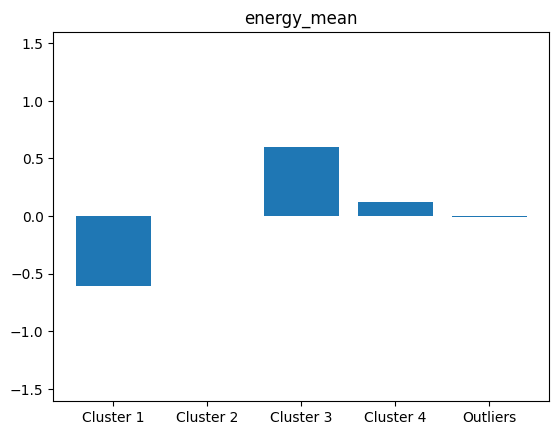

[0.7783008066087757, -0.45312670285648826, -0.7982505140017423, 0.614593455565561, -1.1873578640367337]


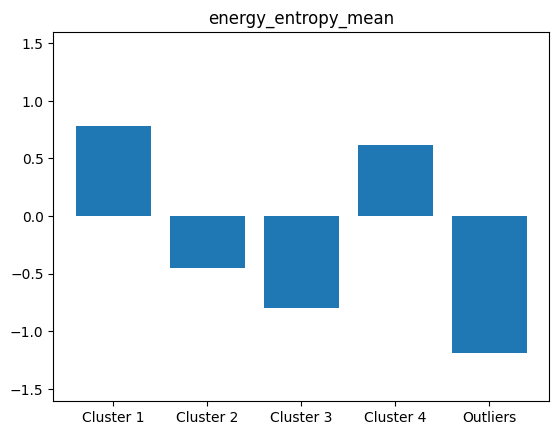

[0.8883244111159715, -0.3177574164365405, -0.5143000352484253, -0.540682050658677, 0.07940499910387036]


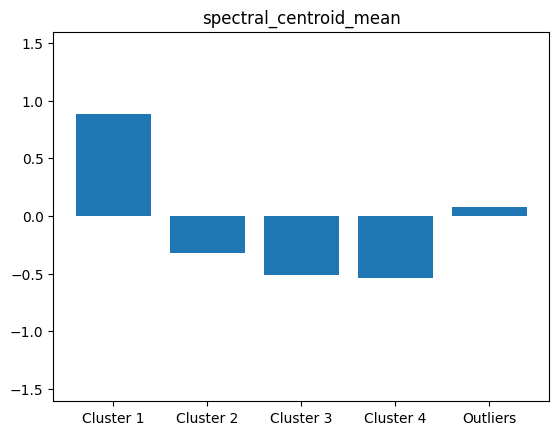

[0.26756037124275256, -0.46346118858412544, 0.2517051441590296, -0.48718134829773385, -0.5066304272179974]


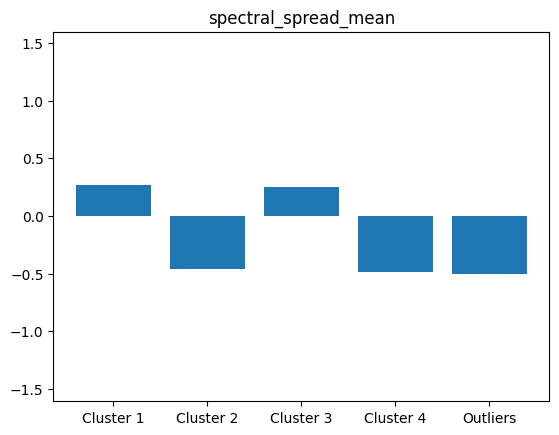

[0.9832288183946329, -0.19499916840067993, -0.7542156050605469, -0.3843026931031906, -0.0969496955440625]


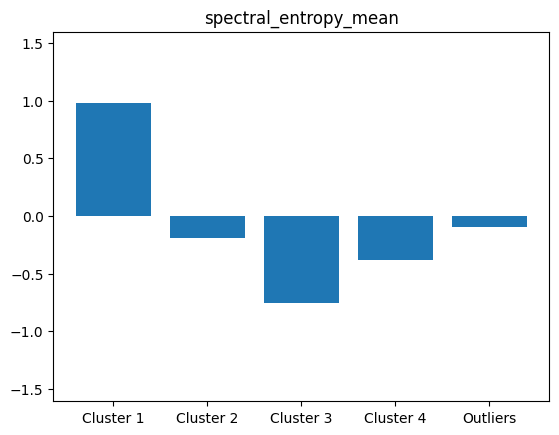

[-0.6546756903914602, -0.16952946738613492, 0.711548203080905, 0.007225973414957253, 1.501853350727484]


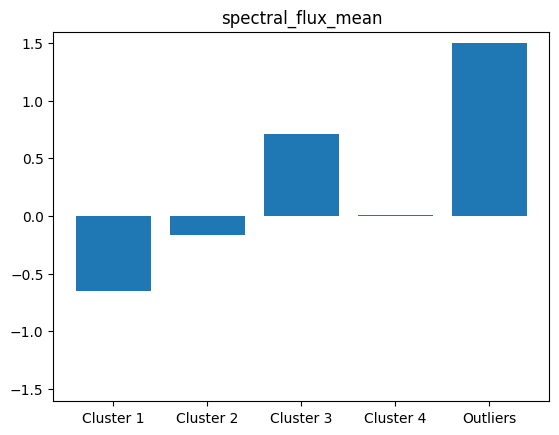

[0.9252327775110082, -0.18264368834138328, -0.727810925218211, -0.35896168806356216, 0.175309683145706]


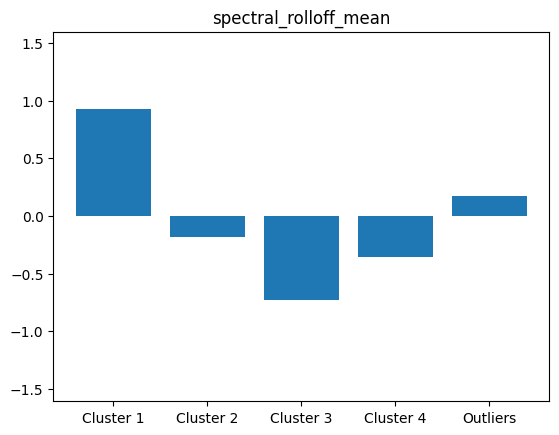

[-0.1802796914899776, 0.11184342806290448, 0.07486820772438843, 0.38040053306565985, -2.138092399669266]


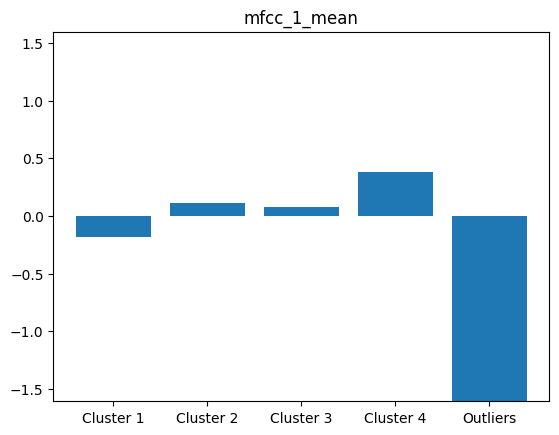

[-0.801807681621339, 0.04317330723974088, 0.5389675981031503, 0.6533085681435518, -0.2537138122025341]


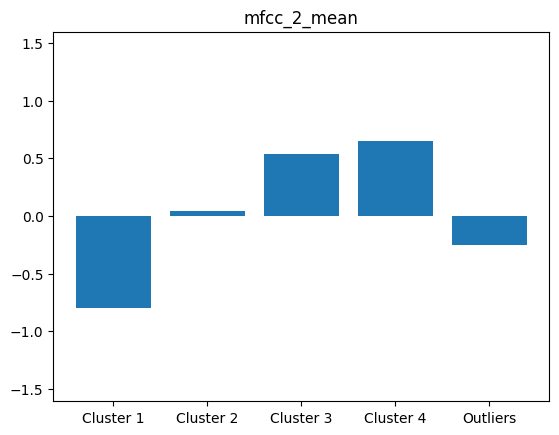

[-0.06874259102419907, -0.7016699202714441, 0.6345085528636313, -0.3438591205697005, 0.33375567323567806]


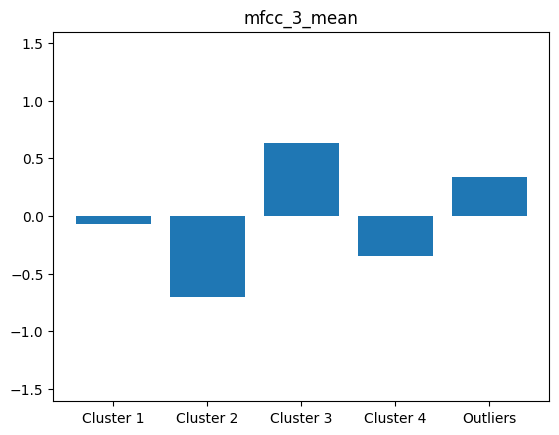

[0.09066721933917903, -1.0582899365837657, 0.8569025759740027, -0.613439901913181, -0.5403132339216403]


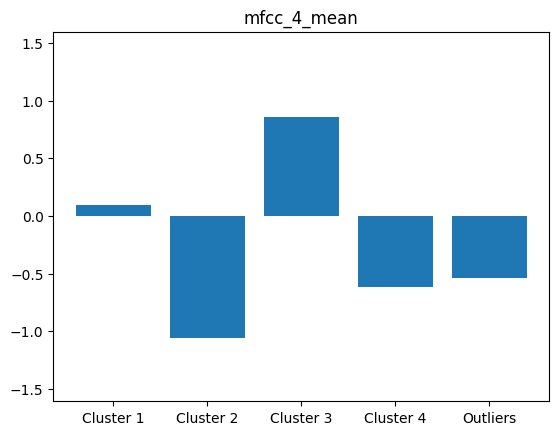

[0.11388983689928776, -0.6101443879658051, 0.674593605333683, -0.8959515488289491, -0.05320699052747095]


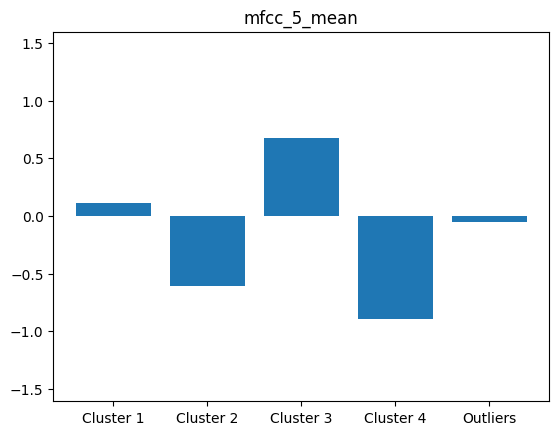

[-0.18073062302633872, 0.5347072310619039, 0.5021928745056091, -1.2545357944494162, -0.2367991145663744]


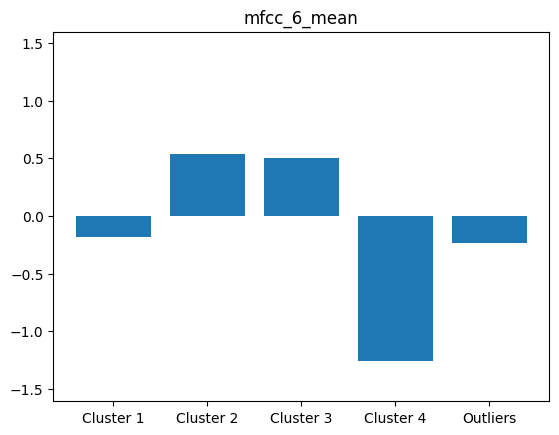

[-0.40278100267305295, 0.8630327969435708, 0.33388678634744445, -0.7959241619871913, -0.36768524874494135]


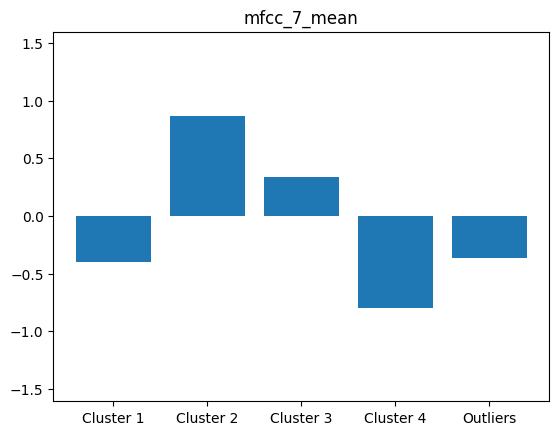

[-0.3754920331200202, 0.306714162236854, 0.36531540660963485, -0.27198068694777155, -0.14855797624398515]


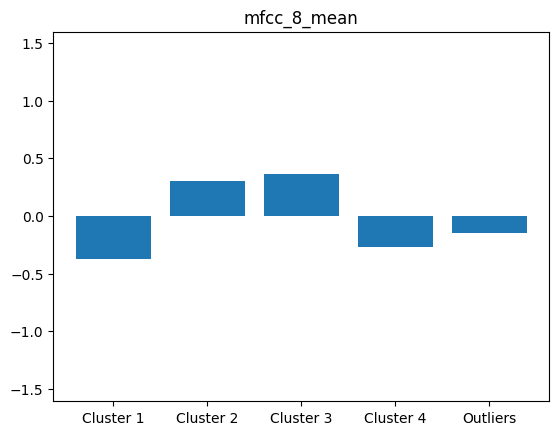

[-0.14456709208300228, -0.9596722670683193, 0.6494399317105706, 0.12316810621009752, 0.21551849477604665]


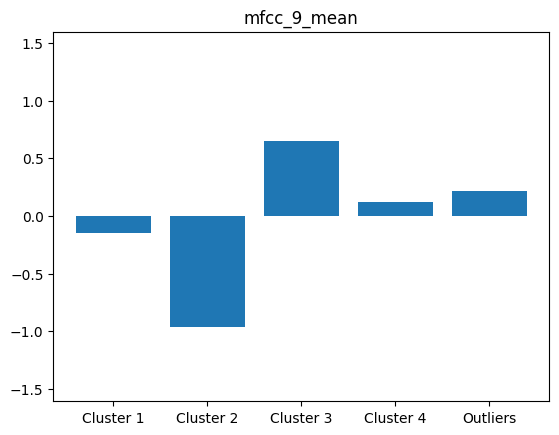

[-0.08867212452579222, -1.0947483918389977, 0.6597494085325236, 0.14602954701550477, 0.18220923398887431]


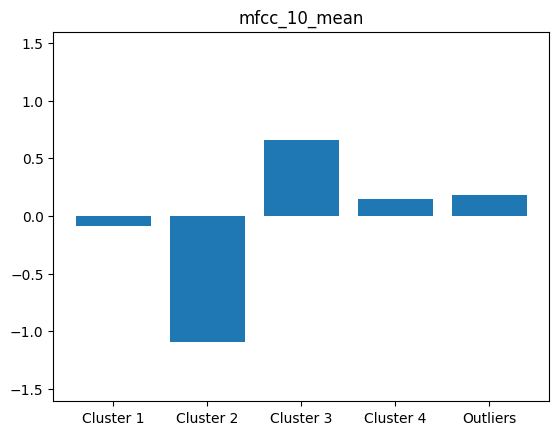

[-0.09912921042661832, -0.6215918951453587, 0.4860500431736379, -0.028861044008665307, 0.02810442722185873]


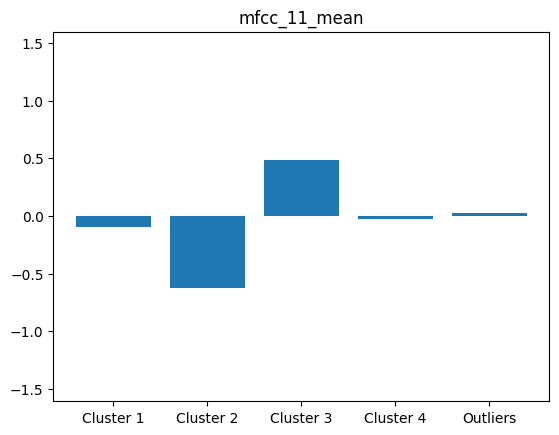

[-0.4310012373495504, 0.41660691644700587, 0.4835774888272553, -0.492083280149558, -0.41840780371813446]


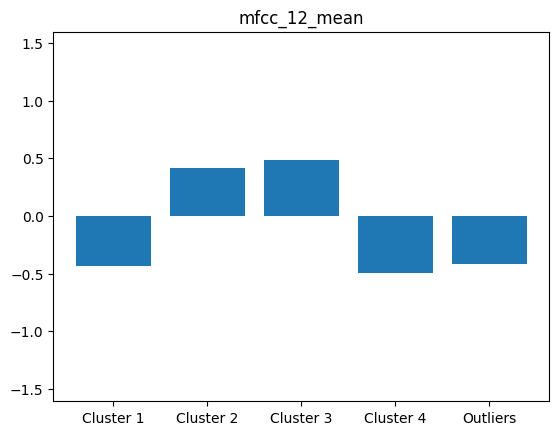

[-0.2934880548619794, 0.4985454599959685, 0.45228283259665836, -0.8363738215567553, -0.39584656985423694]


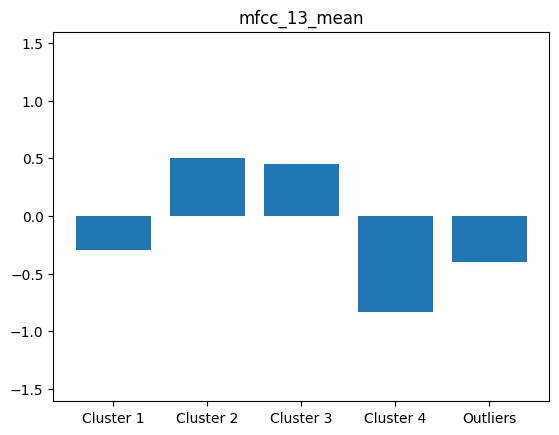

[-0.013029953697620946, -0.17090413335400728, -0.6794575784590633, 1.577407160997396, 0.48699435814988795]


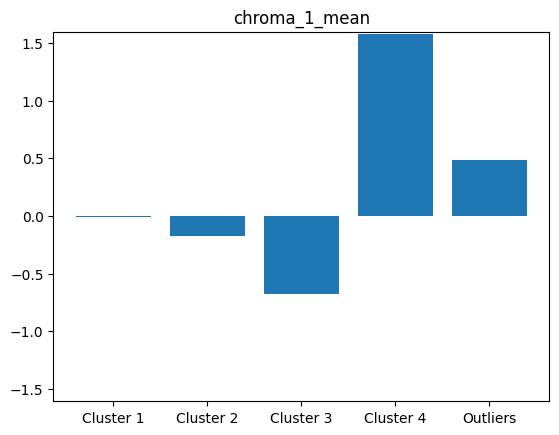

[-0.07320702020783246, 0.11921937655545652, -0.7608624421205402, 1.5117589078475462, 0.6017402935959981]


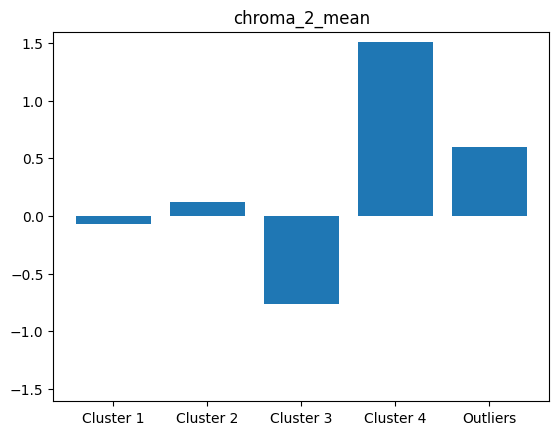

[-0.6061578231591225, -0.4849990125503684, 1.2205139008836423, -0.5071318345016197, -0.5586784839487182]


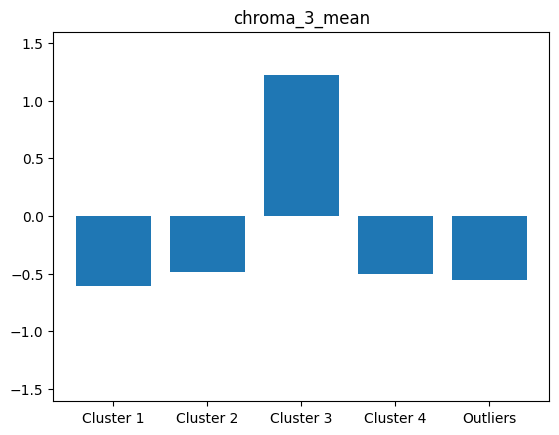

[-0.14996163757976713, 1.1123441000122325, -0.7401687518912328, 0.5334056428494298, -0.20968112401136996]


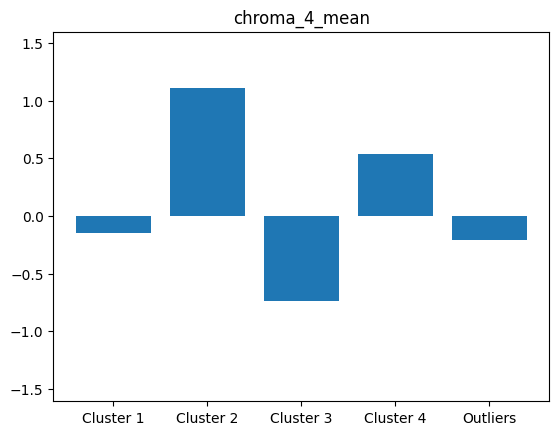

[-0.24329559004428403, 0.8011844400761741, -0.262655832665846, 0.08600168443159668, 0.17843998075818285]


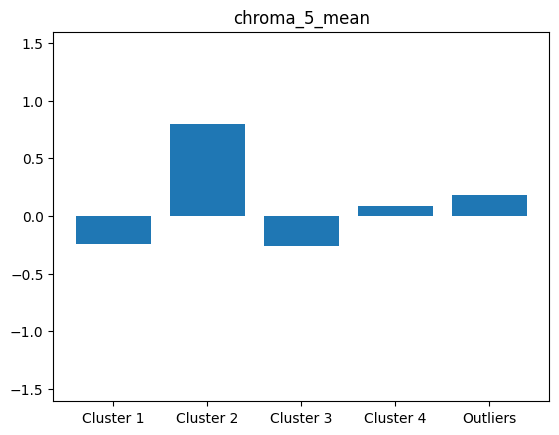

[-0.18357151884971046, 1.1979903308553315, -0.7060911869767839, 0.4190642992340962, -0.09350906410122146]


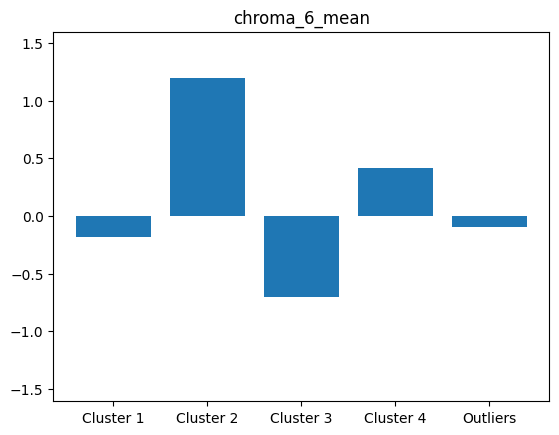

[-0.6484200498139423, -0.5636818800776472, 1.3631077326197834, -0.6194901255574964, -0.4945111419831979]


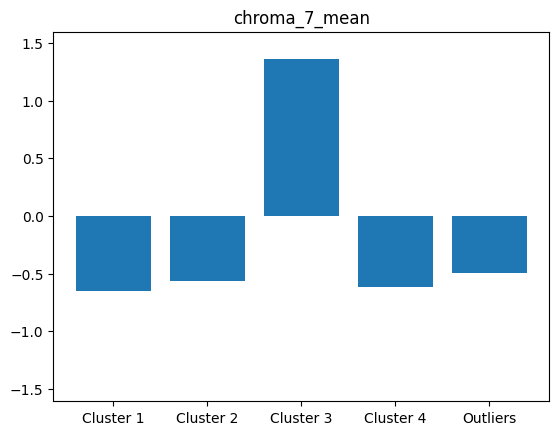

[0.14072775649230493, 0.8165348971078418, -0.651458817044568, 0.06485509595487864, -0.2240374461009256]


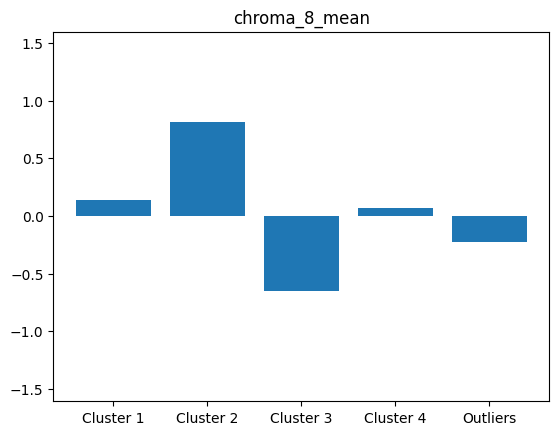

[0.05559881246567924, -0.05335184952089789, -0.747447919770672, 1.4325872464756841, 0.4008704602211937]


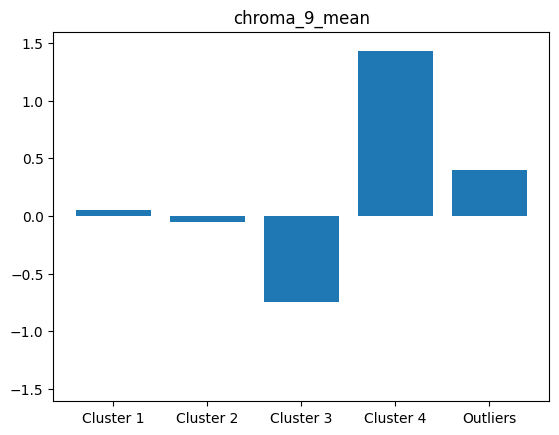

[-0.031121161036072688, -0.2344315882352491, -0.579965532091564, 1.4907081139590623, 0.47958729264091404]


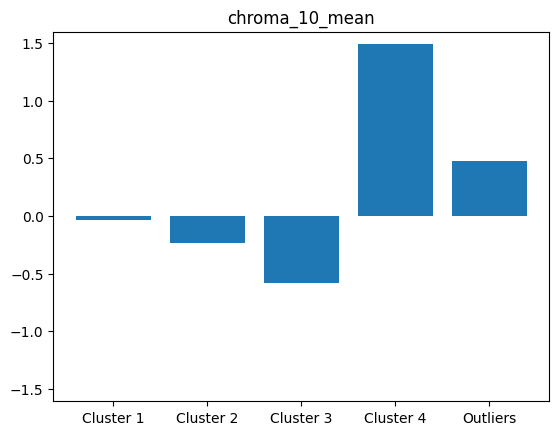

[-0.3245686486079989, -0.5167356133546245, 0.39192675068002075, 0.5454450788879203, -0.01685033069112383]


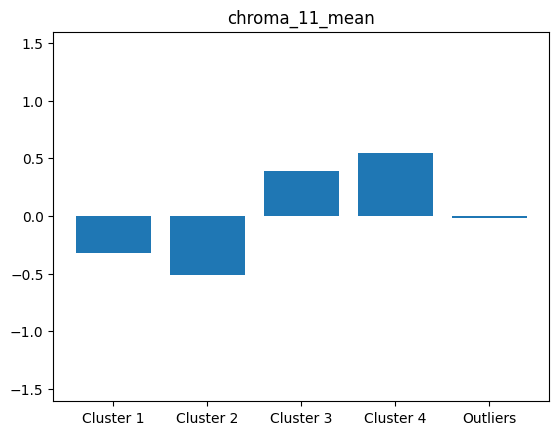

[-0.07775356384434343, -0.1574887482632344, -0.6729929421528582, 1.6630979625043452, 0.7154595541605518]


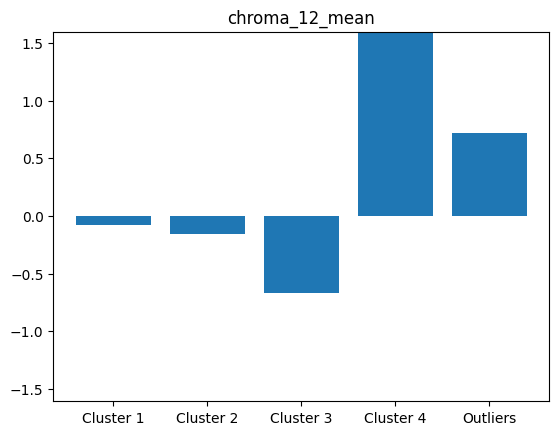

[-0.7765731540457681, -0.4622343363052603, 1.3629261895503972, -0.4723688026257706, -0.37400056691877376]


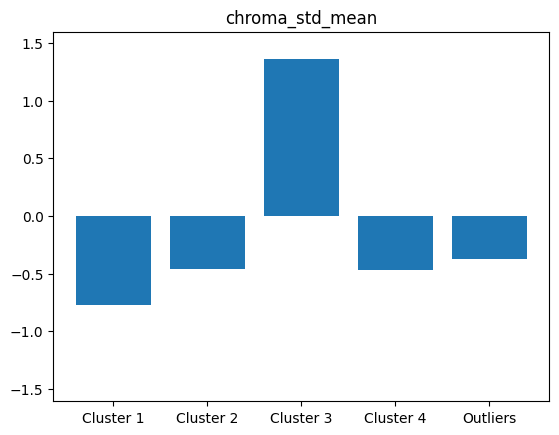

[0.046718301781560514, 0.005396722847236374, -0.05546914996150687, -0.029675406098107326, 0.2657107706153424]


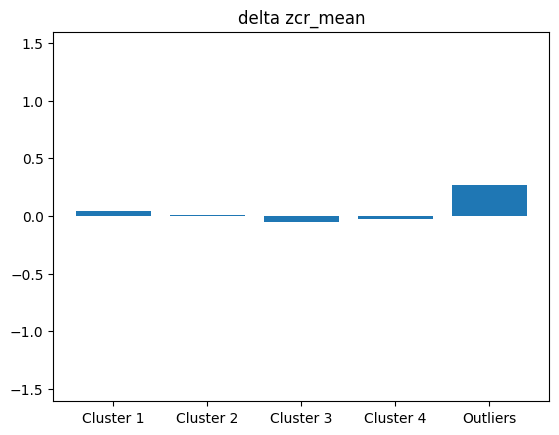

[-0.009967094488435661, 0.0055053766743714426, 0.008575172280892312, -0.004731927579160525, 0.020140781997160673]


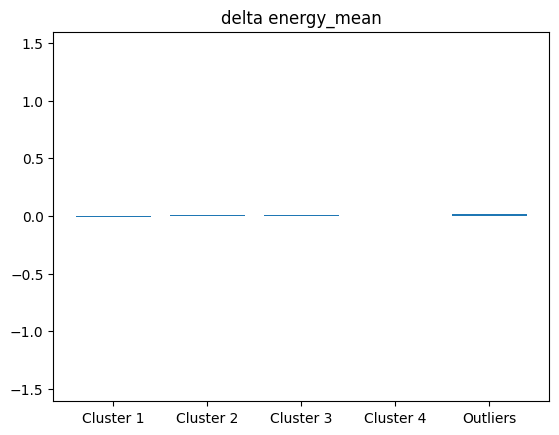

[-0.03790730366975656, 0.053428387101786656, -0.0015787541904895412, 0.018816484310400727, 0.030403985125907772]


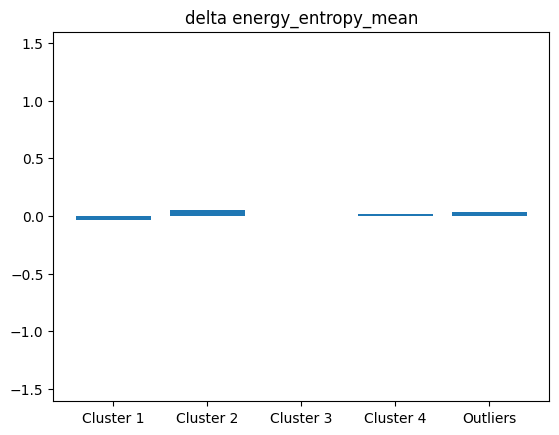

[0.03586135914275524, -0.0026560190860455374, -0.029600375141703397, -0.04677486506023635, 0.24757661826366698]


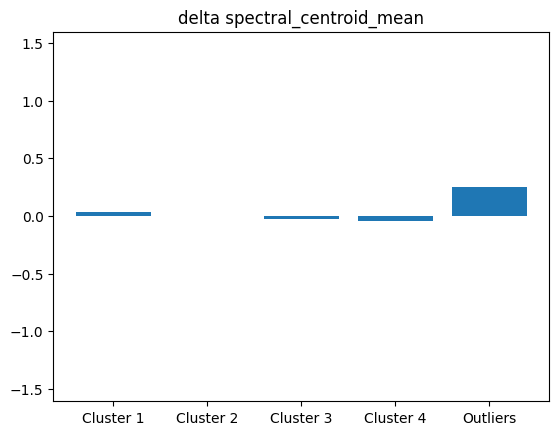

[0.009337289887467723, 0.009574589376724008, 0.005281005895983092, -0.046283220249903854, 0.02330896782505908]


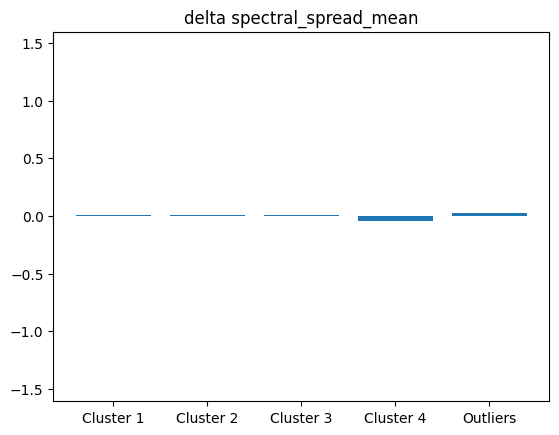

[0.021164997833576654, 0.012025891398280173, -0.02885389712368102, -0.018730291356944925, 0.13075022806928852]


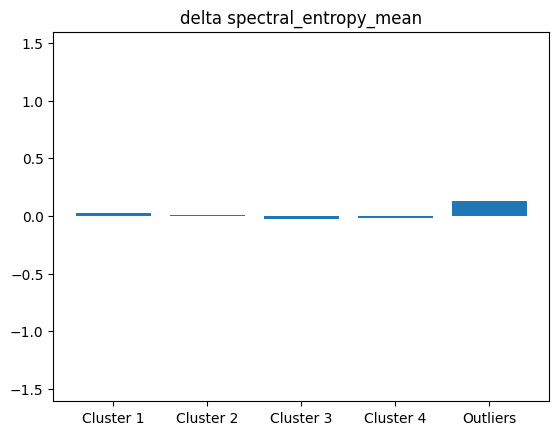

[-0.05702317494893035, 0.009698316730670993, 0.053943883553781956, 0.00584394488096899, -0.015349084579317196]


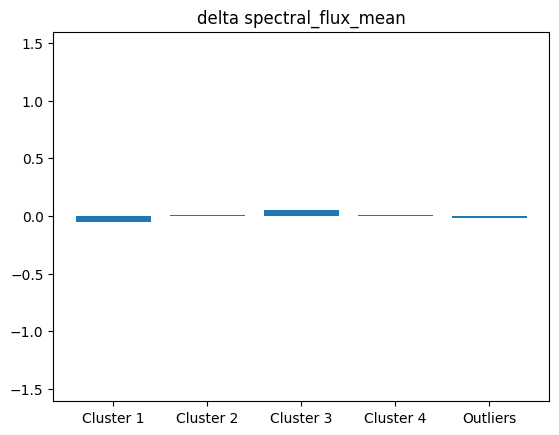

[0.039105423244943566, -0.006368272072763293, -0.035280172124063085, -0.02034549691311716, 0.10937627689991072]


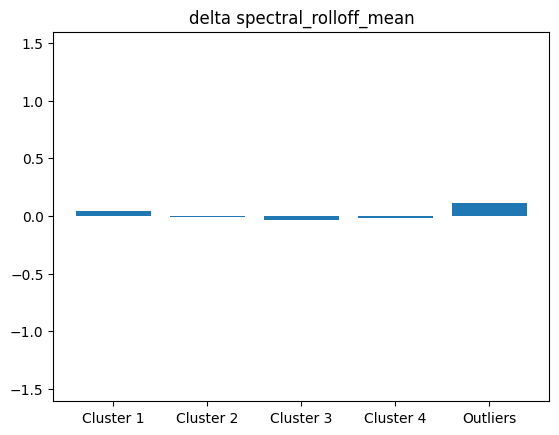

[-0.014402567808926136, 0.06566282641071589, -0.01123071829075876, -0.042325241381202604, 0.13999036958541342]


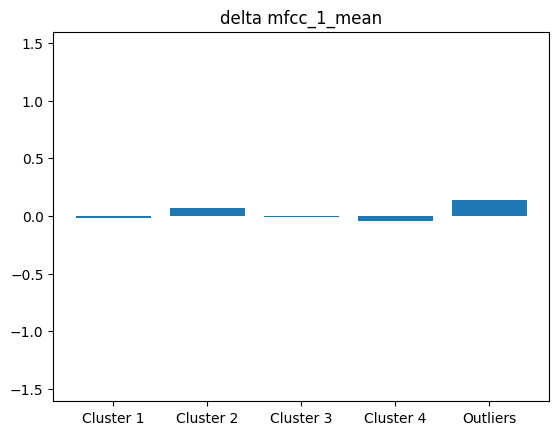

[0.032346725930958976, -0.034791485378462585, 0.010965662232254538, -0.022634857747099005, -0.23548904280145164]


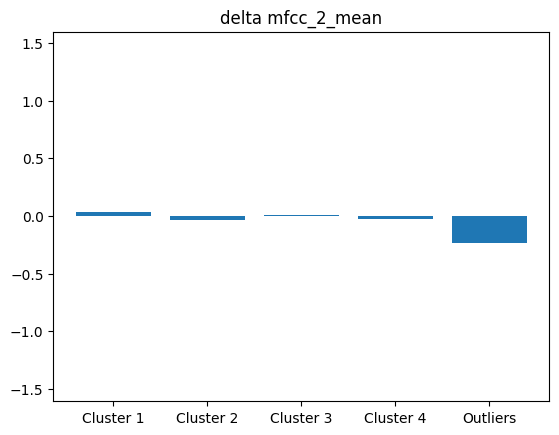

[0.020137005508251513, 0.061969591443837055, -0.019190911015892133, -0.08027654629000751, -0.0032819447462352222]


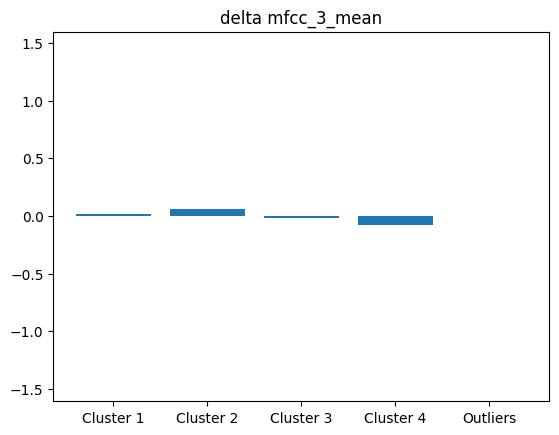

[0.021282188097641225, -0.037569825015699346, 0.0005680744787642853, 0.013873541896855772, -0.13260733511836337]


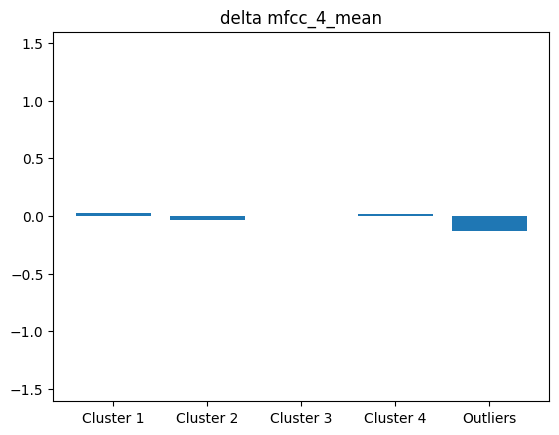

[-0.040048751691641876, 0.039200403755429464, 0.03259316585772441, -0.041253795683484154, 0.12292786362528414]


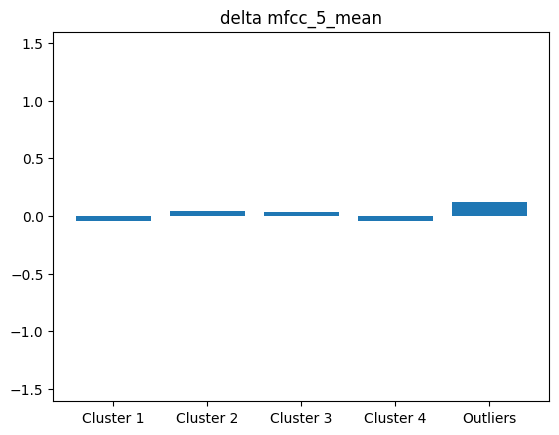

[-0.015627341242942717, -0.054309850468292654, 0.04985437366823764, 0.01404376752024655, -0.1267931990131241]


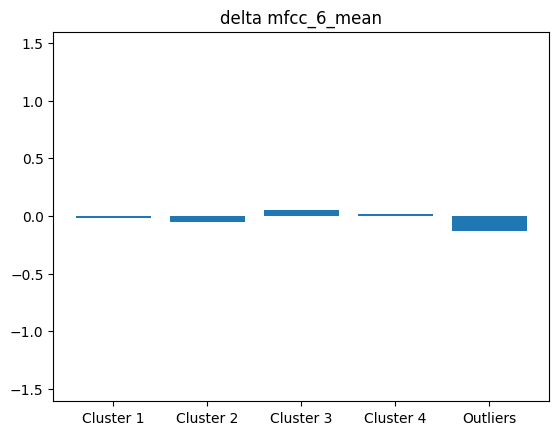

[0.007748344224179352, -0.005259147564294212, 0.0004502284137362389, -0.027059175549101155, 0.12119456221762177]


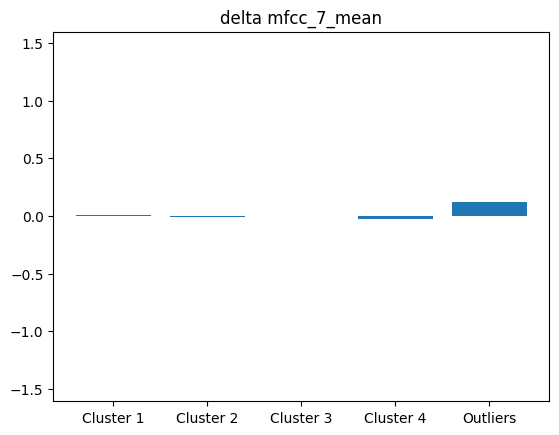

[0.007933396196912657, -0.023640508063599876, 0.006345566132513968, -0.009603699860853592, 0.060456954914156945]


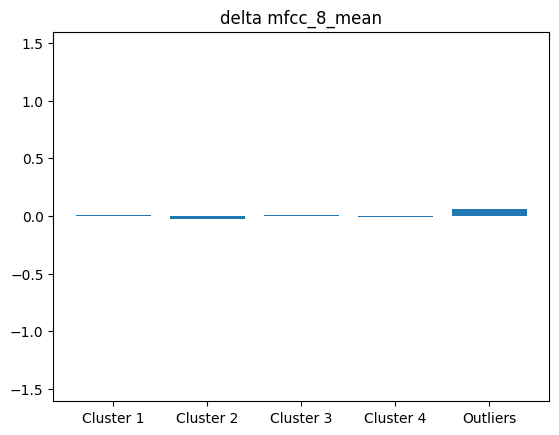

[0.033956960493760215, 0.015009168806047272, -0.03961570313019232, -0.0056955926624934474, -0.05137566812257757]


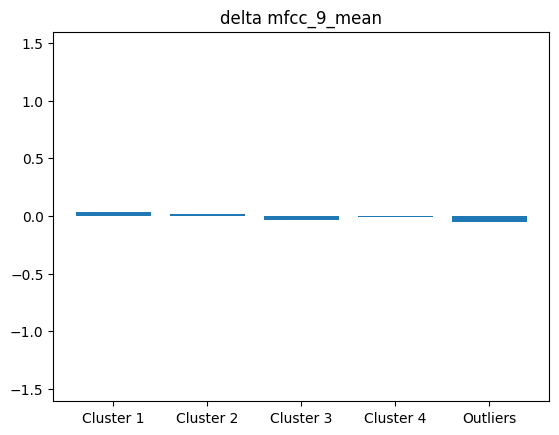

[0.02397275655014953, 0.0010407852440082249, -0.027148657331568585, 0.029164662257520808, -0.22069355311534955]


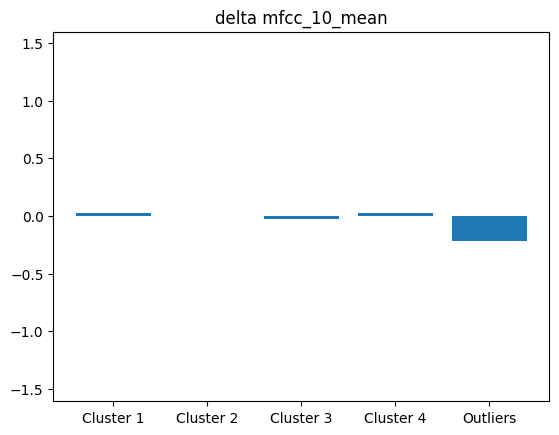

[0.03220495712847512, -0.002086250473699915, -0.03697237993982553, 0.01165618934199751, -0.036249882946419267]


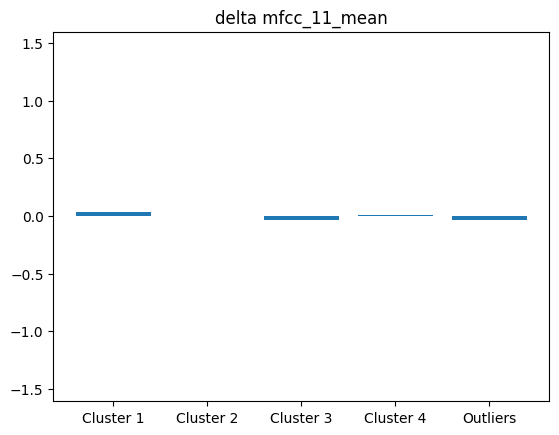

[-0.0011119407400928996, -0.009118887222096349, -0.007305203475395939, -0.028090256921637982, 0.45016707476452333]


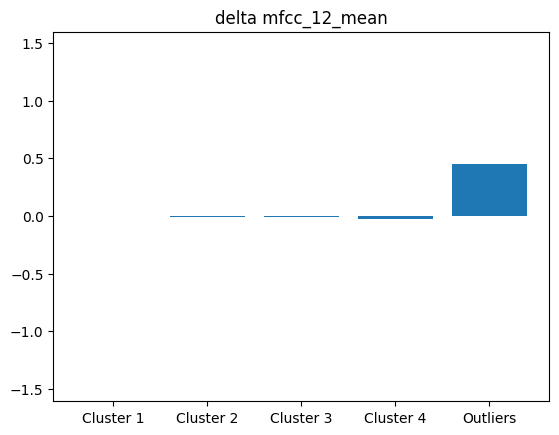

[4.201913345876868e-05, 0.037662181929274334, -0.017451548985264808, -0.00752998356509778, -0.019081134274988507]


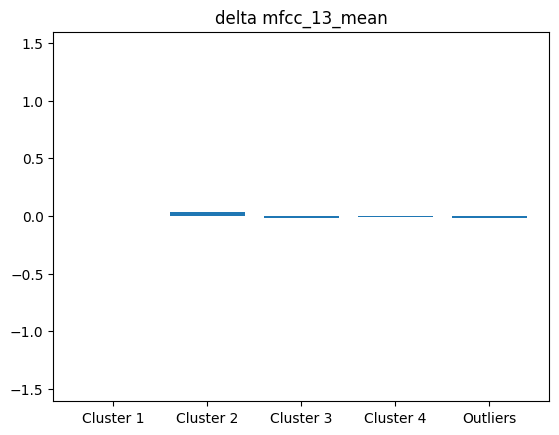

[0.04764465895139206, -0.0047714044486473674, -0.003711246073690653, -0.042196979246753065, -0.4003025987493305]


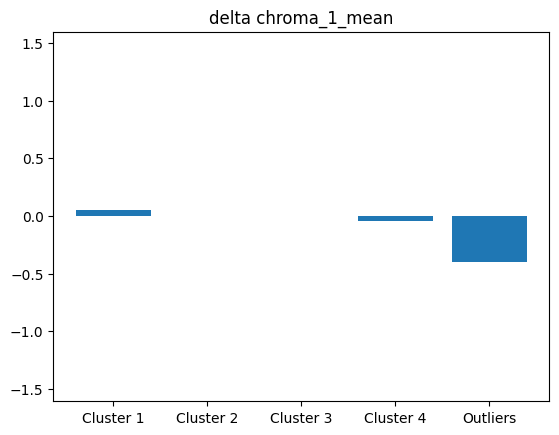

[0.029526501418482197, 0.022355340319744992, 0.015046346058993224, -0.0992575909496341, -0.19642418887463928]


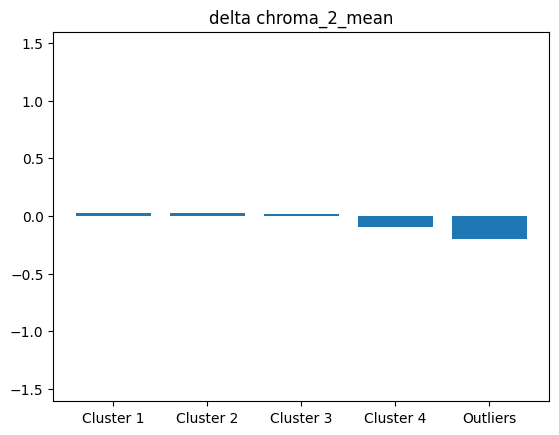

[-0.0005480487979639309, 0.0012489148464787806, 0.002149318762774684, 0.009066842603778678, -0.10949648148184356]


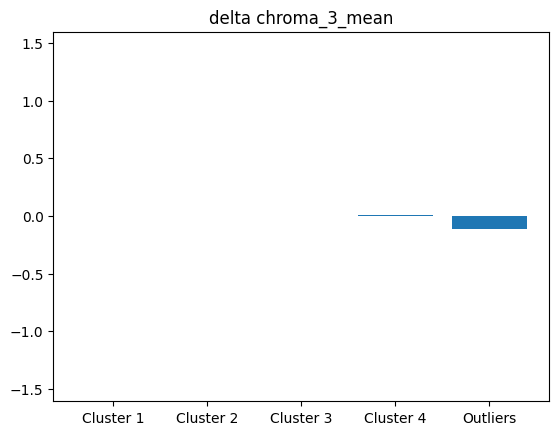

[0.011399673876575457, -0.00024730798547304024, -0.027826891579870186, 0.02400642921442224, 0.06595445202839832]


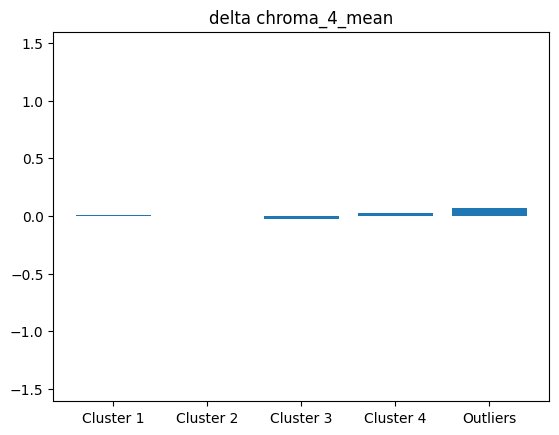

[-0.024619962420253945, -0.03462966988629858, 0.046932254340965755, -0.0035906708722003174, 0.029792596877889682]


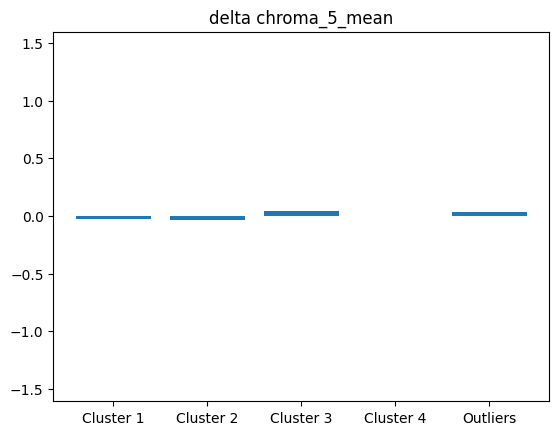

[-0.000158028456677257, -0.009476080127135173, -0.00172949056315804, -0.01160226001534202, 0.21467531684808713]


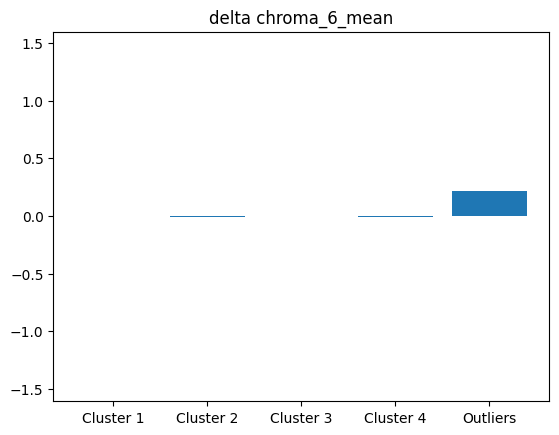

[-0.000765967920485048, -0.008013958195814784, 0.025770119213999333, -0.016979991915477218, -0.1961599071610913]


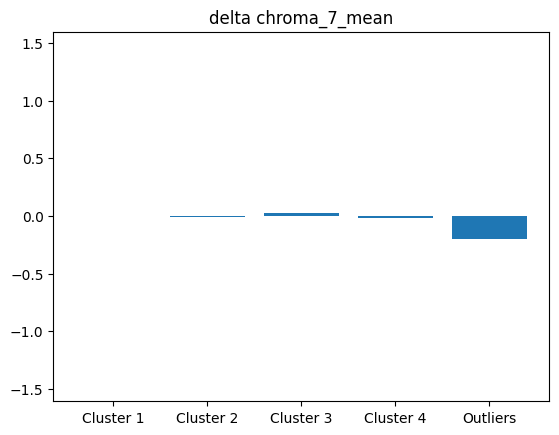

[0.04251669059720519, -0.07234570003631122, 0.01362575711744436, -0.006598104214730382, -0.22328890339490107]


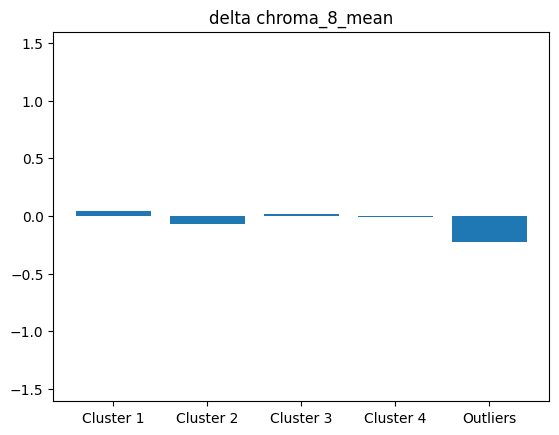

[-0.015536968696902107, -0.0046715078449077845, -0.026480009679276675, 0.06577962899085231, 0.23119804575839564]


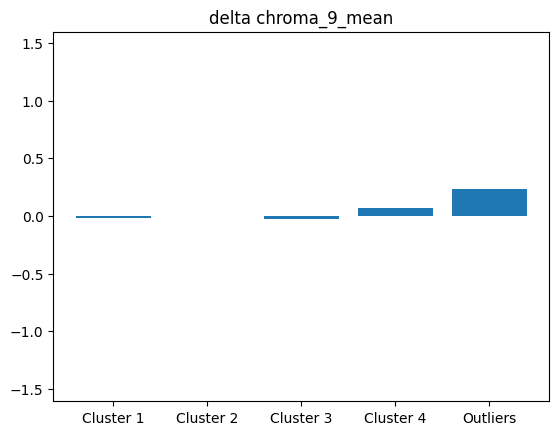

[-0.01943819698295369, -0.0028668505686167177, -0.0029189362603736996, 0.01979755936858779, 0.26188151676470967]


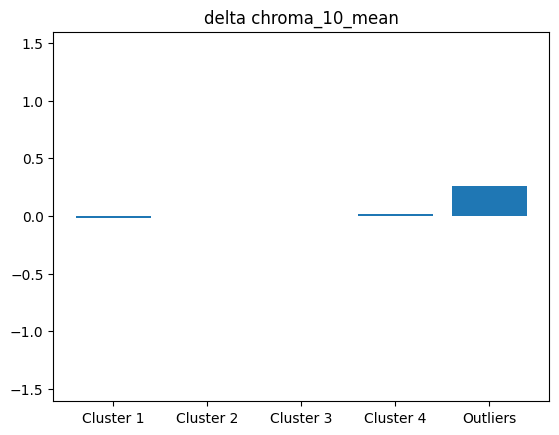

[-0.028955335824847255, 0.02009352257310009, 0.014151798420107557, 0.0478974181385237, -0.29406065694775263]


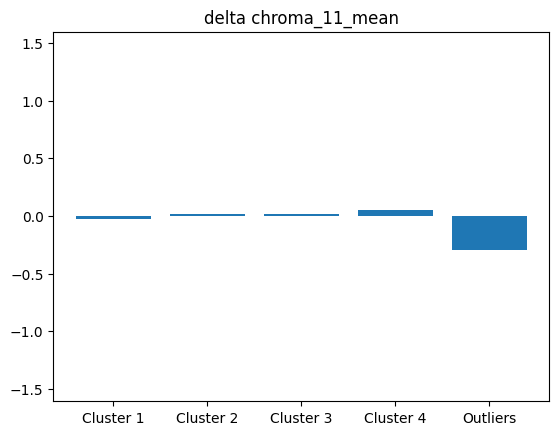

[-0.01074166043394797, 0.00942985378502266, -0.013931235746034195, 0.008712590914314644, 0.2576487135700042]


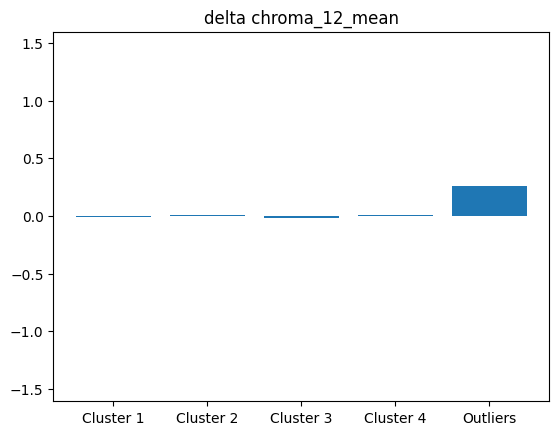

[-0.0015570741966097303, -0.002424199521617182, 0.021647329488037007, 0.013868595417159183, -0.4134411555888306]


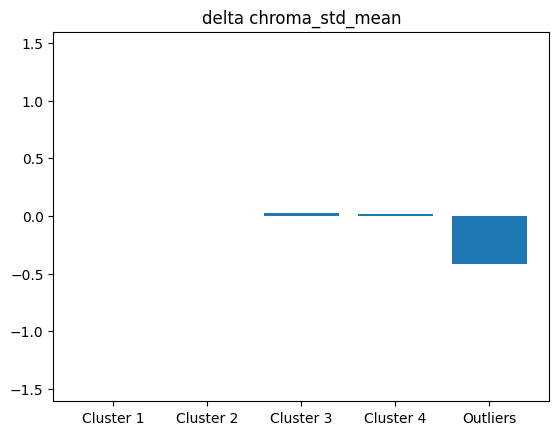

[0.23912326375253026, 0.3398887614107081, -0.396814242864545, -0.1849803199982121, 0.45472574983300074]


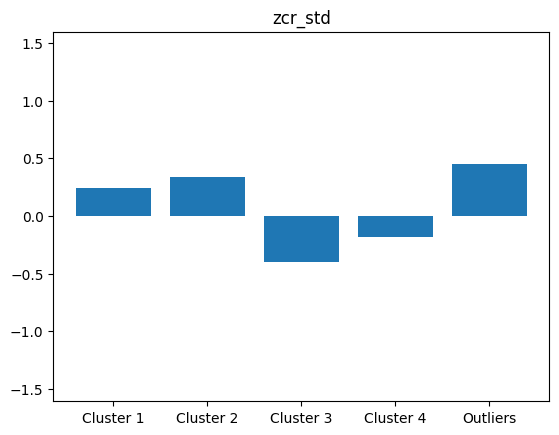

[-0.6664439559022022, 0.2729242230663733, 0.3563762053967073, 0.31981409766712654, 0.7701046399889195]


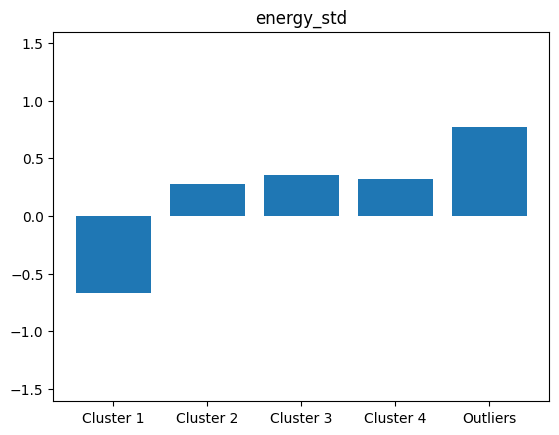

[-0.3324464861770822, 0.8322617008717206, 0.09468915440821311, -0.5992876556432524, 1.0417459311189863]


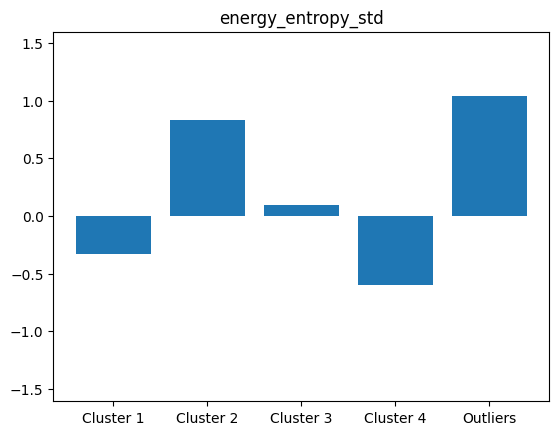

[-0.2652184019950961, 0.5873365140050514, -0.16294685936694925, 0.03303660555853392, 1.4193175328999421]


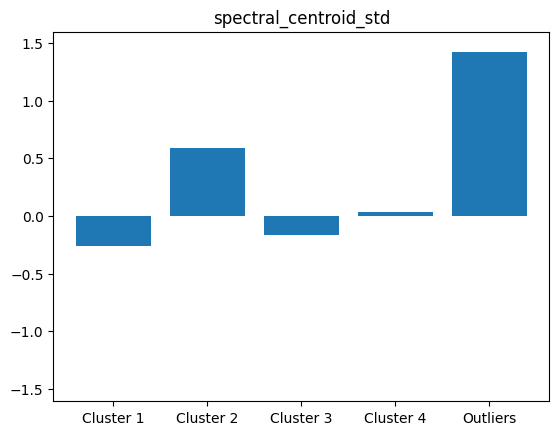

[-0.4884787144398884, 0.4459943700039365, 0.004165055707991445, 0.3993497029505857, 1.0878663911833686]


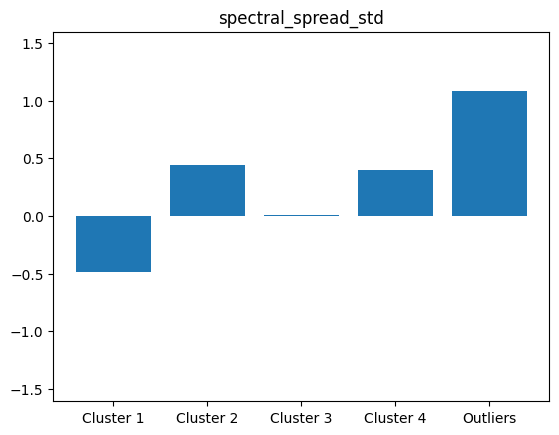

[0.4086281336213804, 0.4695206898319094, -0.6033693176862721, -0.25289410327358985, 0.12724744323109172]


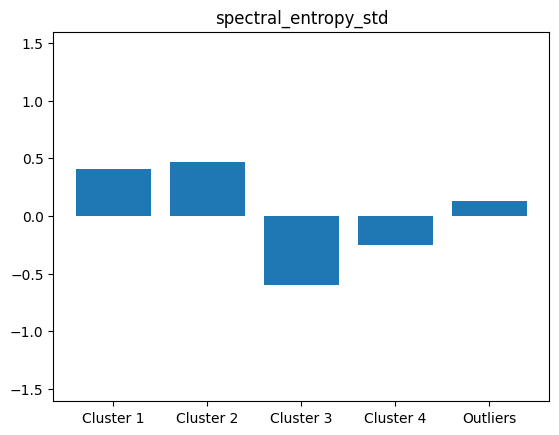

[-0.42609400216080007, -0.08931628771511933, 0.39375264517669345, 0.0008336241991402559, 1.9404136064863657]


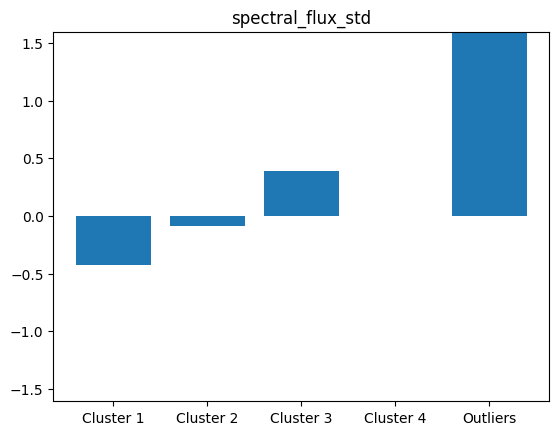

[0.37470396150160984, 0.2864933157641831, -0.4774099666832359, -0.2332284896096312, 0.27659557527607065]


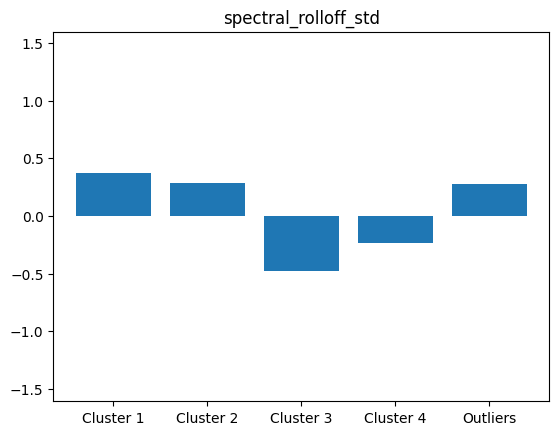

[-0.2552377311312059, 0.3512242081068986, -0.04569229920131488, -0.06106601494685538, 2.3506543602386225]


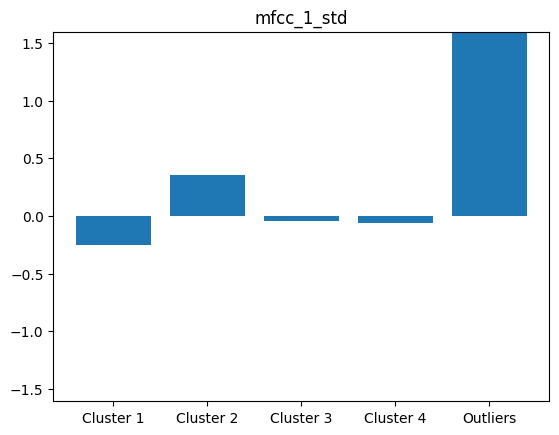

[-0.30161435635773176, 0.7016775049748555, -0.18535265939969658, 0.03398959405319758, 1.3173654607373024]


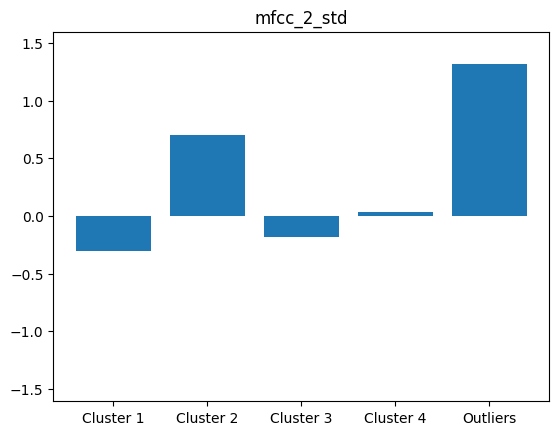

[-0.30195324485921304, 0.8931609799694054, -0.22985150808009908, -0.09887720527384664, 1.2565957813177917]


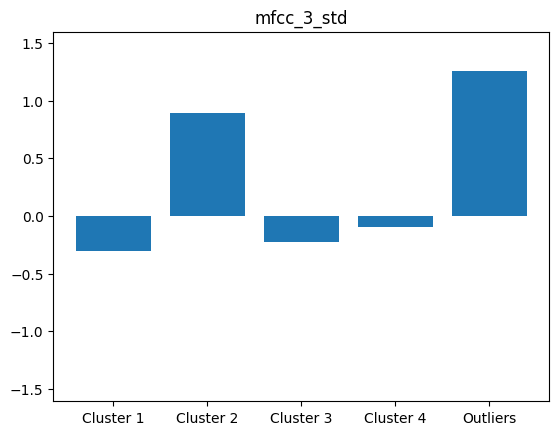

[-0.4056399358135261, 1.3747690633472218, -0.43156406222711596, 0.0004965962110270637, 0.9507919367892906]


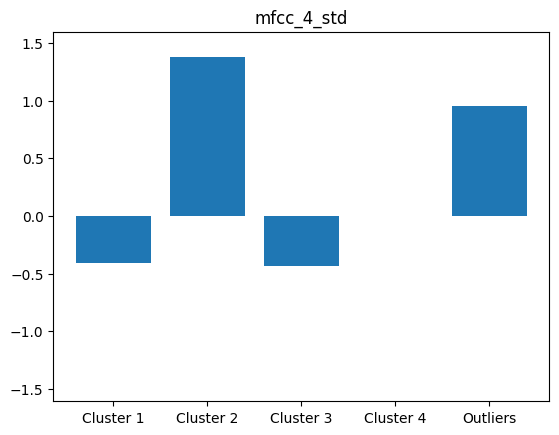

[-0.3498808993338269, 0.8602379402224388, -0.4518790531291669, 0.4634880873083095, 1.5938108569451621]


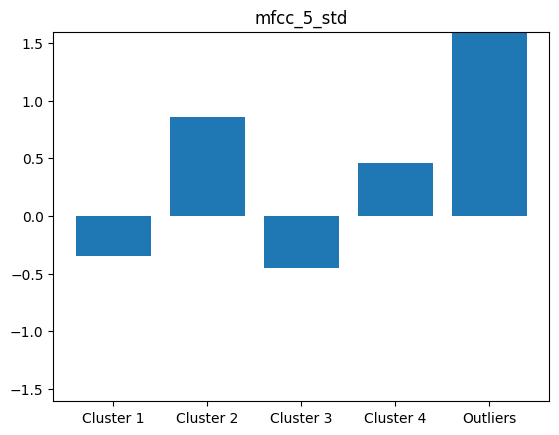

[-0.3598663762969497, 1.262118760892855, -0.5069370410099505, 0.203783105517084, 0.8507084113292849]


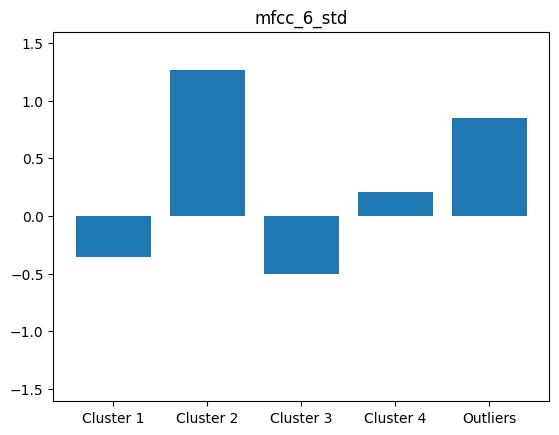

[-0.36466834802496884, 1.4633661137486176, -0.5488790590491579, 0.05048212084441167, 0.8947854538687076]


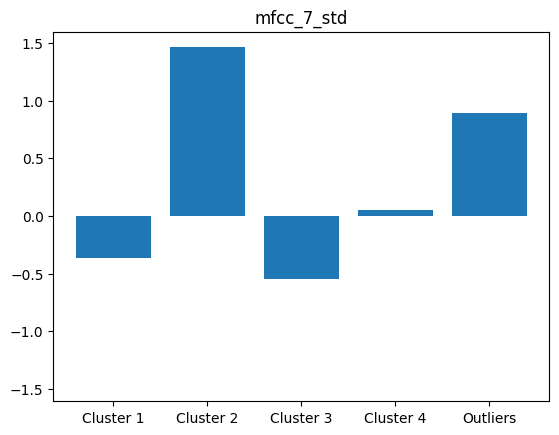

[-0.3122218724442917, 0.9749422062718718, -0.5279760485567023, 0.4507759661451848, 1.1669827908963184]


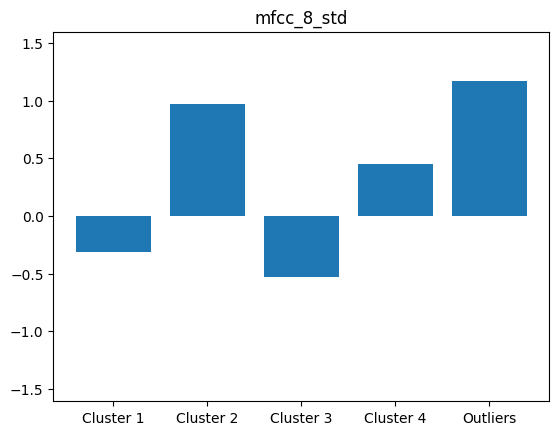

[-0.3160829361119715, 1.0068612851109557, -0.5196957486813795, 0.434098462413721, 0.9237281375144404]


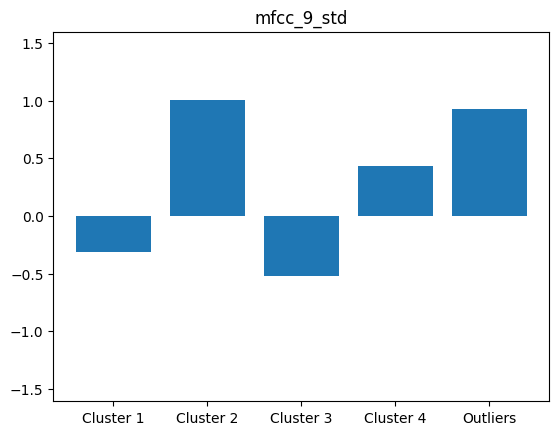

[-0.3481281081534664, 1.0689620837332758, -0.5074743146864431, 0.4048344053356857, 0.9223786952947046]


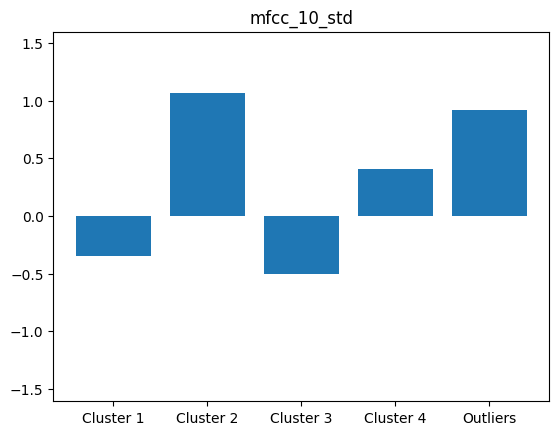

[-0.28236601467758166, 0.7389107472447723, -0.4389794433932598, 0.5167328750962424, 0.9389154359540756]


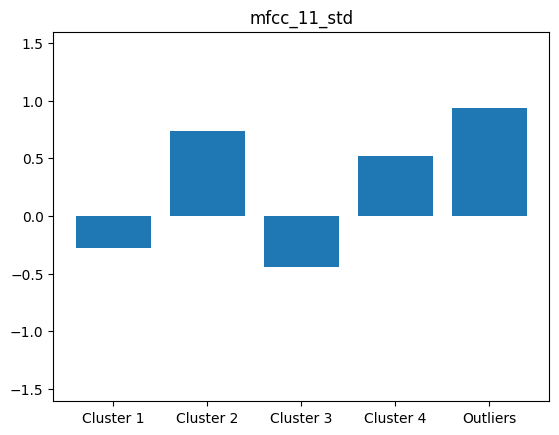

[-0.28744448149522944, 0.7632795244545649, -0.40408253544486067, 0.4389935729381941, 0.8388989119752258]


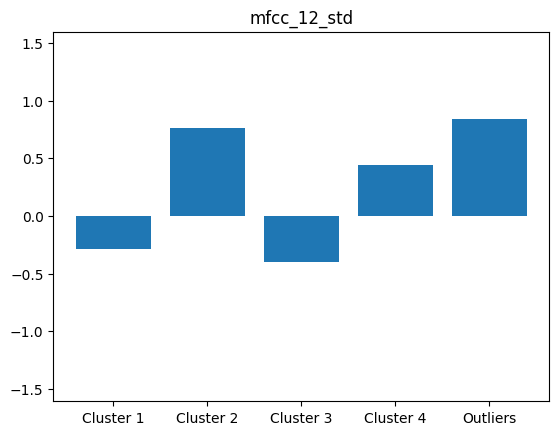

[-0.2609277890777517, 0.755485229666617, -0.3923273687686261, 0.4193400530330465, 0.4091191700706716]


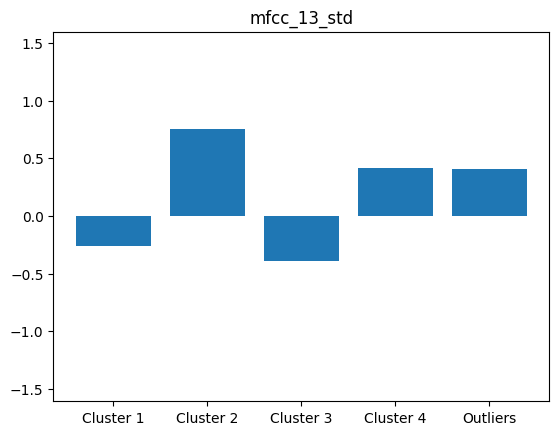

[-0.16777367541075952, -0.03357938030998897, -0.6127542189754918, 1.5602485217781559, 0.939522381545604]


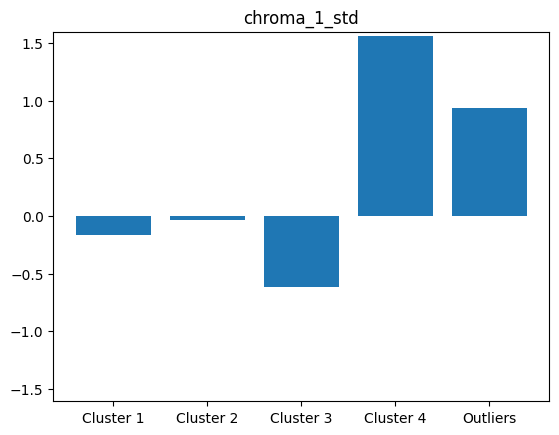

[-0.20394236798454923, 0.17107842139137117, -0.6522634326448062, 1.4597777459220125, 1.0459574779098522]


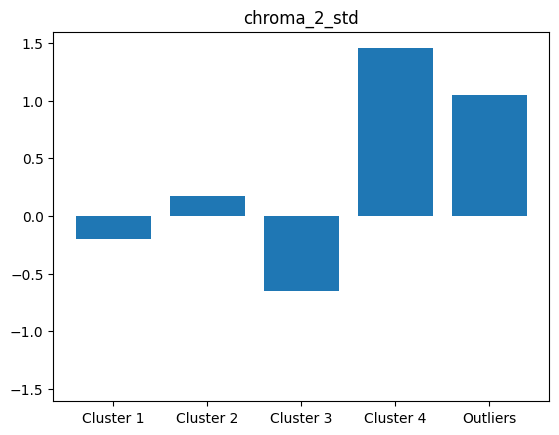

[-0.6941363787986949, -0.4338659965420892, 1.27871287066869, -0.5027382382934933, -0.4853270425306932]


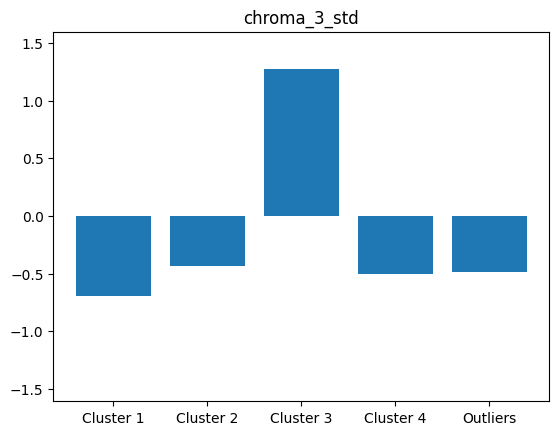

[-0.24360686711287297, 1.2011593523252169, -0.6996687993193773, 0.5087954891064886, 0.11970216247331504]


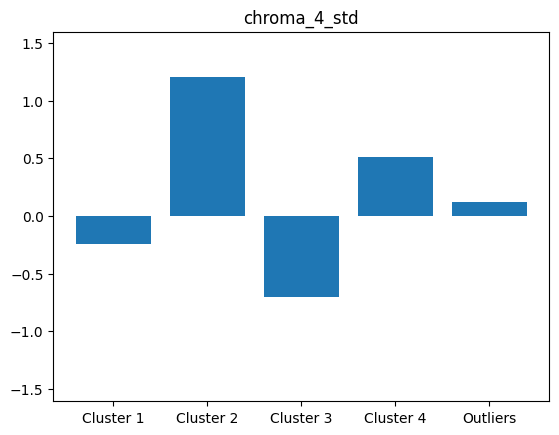

[-0.38883132666690295, 1.0704757006288739, -0.29828605296549093, 0.11834867393771997, 0.4759856178510926]


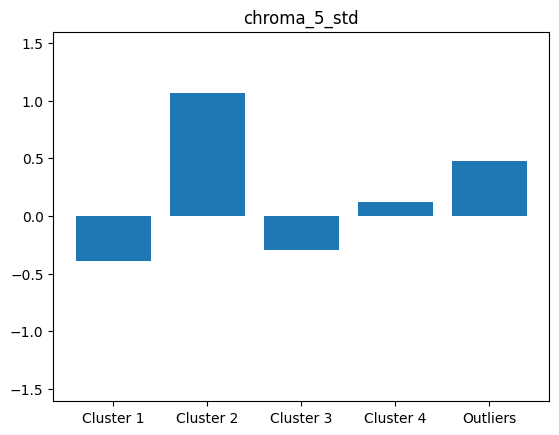

[-0.27094431348043746, 1.3076369332555564, -0.6652709705303386, 0.3565767604412822, 0.21913164195127396]


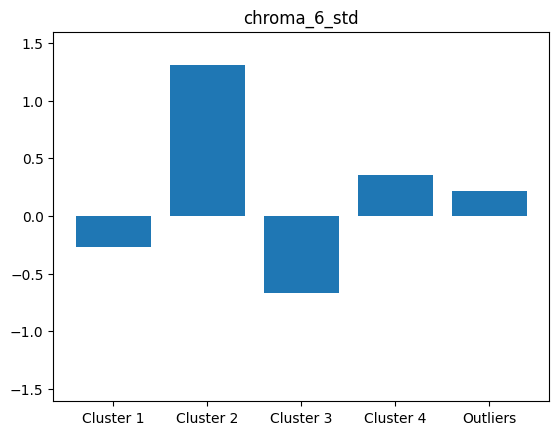

[-0.6877590169973447, -0.4446486342086318, 1.3069690624489958, -0.5830412074725396, -0.3192527400531597]


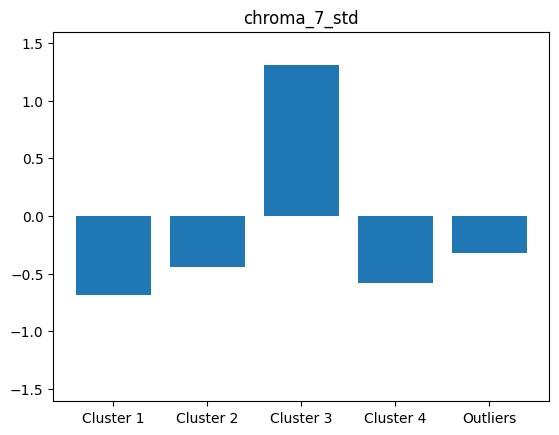

[-0.0035711244174048864, 0.962655592989576, -0.5728473795154324, 0.015864532528372607, 0.016613708431780876]


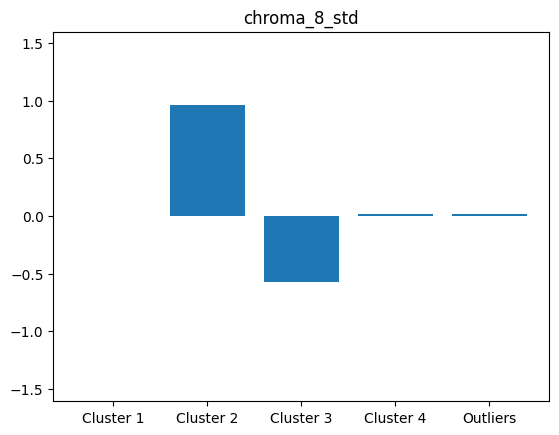

[-0.12430889860082686, 0.05630865519745471, -0.6631540201802618, 1.4544856872905123, 0.9674345996584942]


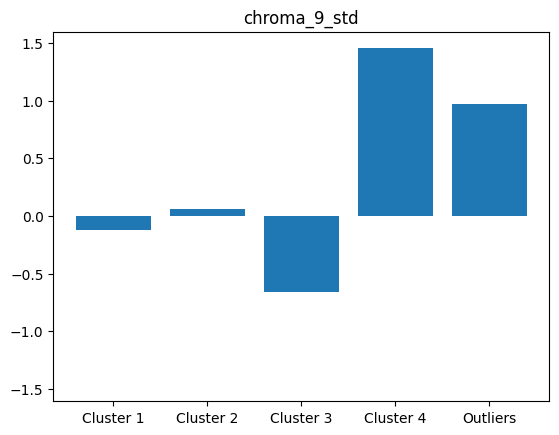

[-0.20239435735966751, -0.09469947477982593, -0.5172945766371744, 1.512031844547053, 0.9616353618052249]


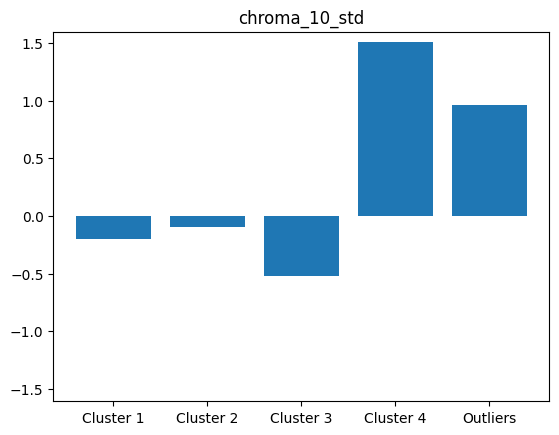

[-0.4970675491881683, -0.44668791560020843, 0.42618476189889054, 0.725795902531262, 0.3631825734433204]


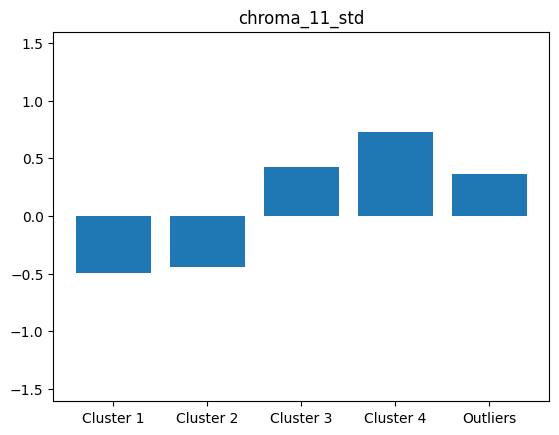

[-0.18917487729306584, -0.07867357917054879, -0.5847390262072721, 1.6003142530887589, 0.9767647540144113]


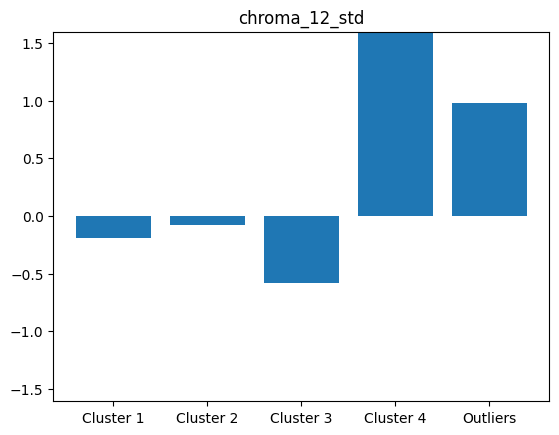

[-0.8416774616125687, -0.171329622624957, 1.1629877600084861, -0.3111394557733523, -0.03961720614246799]


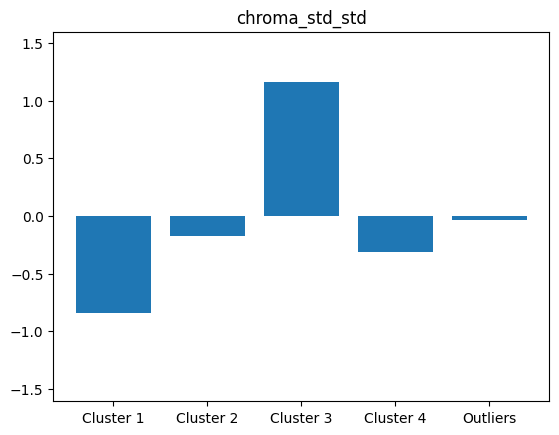

[0.3322795391571751, 0.05380264885088922, -0.26327870296435585, -0.31782647015044374, 0.43980924531232696]


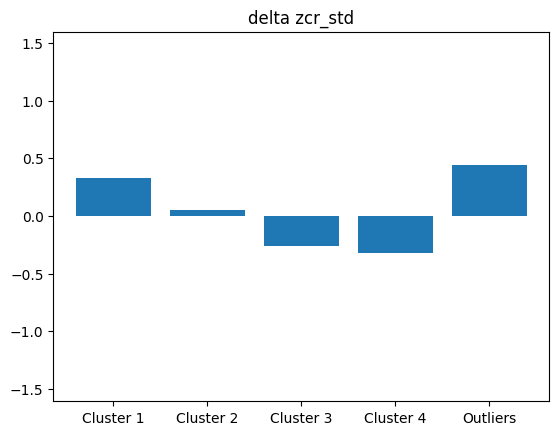

[-0.6280955210980733, -0.10297101861198725, 0.6297437459271537, 0.15007868508352956, 0.5949255981205717]


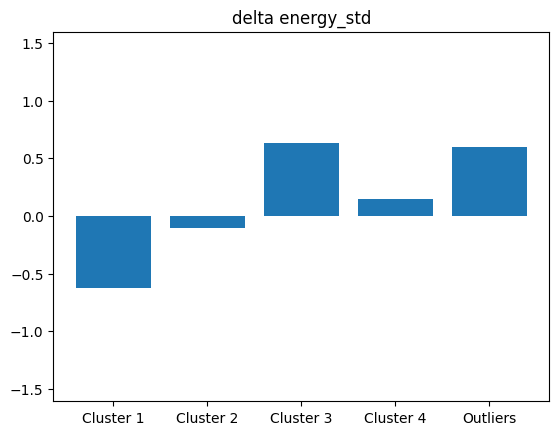

[-0.34307745327029954, 0.4607536471566929, 0.2974835824383554, -0.568947123244907, 1.2574392301627015]


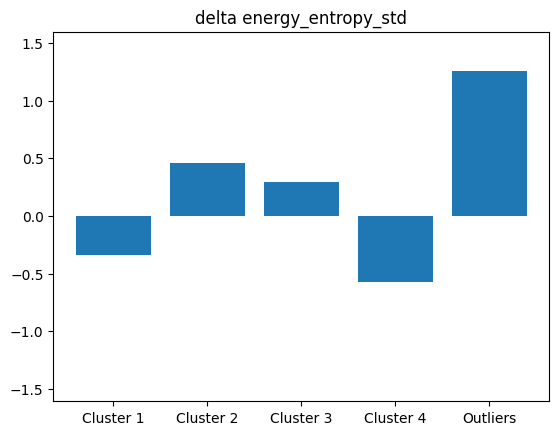

[-0.46450621868538366, 0.27293333241849826, 0.18996832820754658, 0.08905236761751485, 1.7563106281018883]


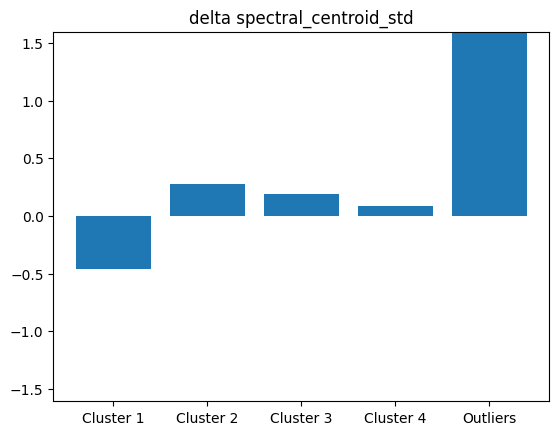

[-0.57399510451506, 0.4462091363582191, 0.054493784382934715, 0.4909670817581638, 1.0462434368980082]


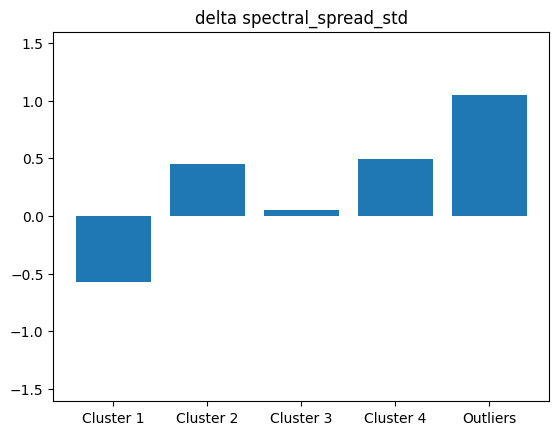

[0.5576025216406544, 0.2284741654196389, -0.586559987542837, -0.3382690772468207, 0.22495597502247805]


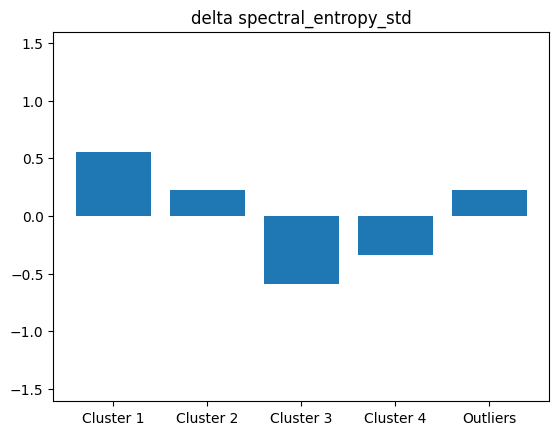

[-0.4181712929638724, -0.06903997266099539, 0.39965818681011656, -0.04484294834106934, 1.8703276294938336]


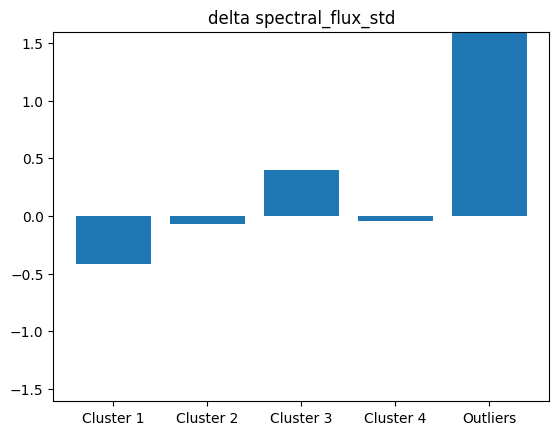

[0.42869522337103727, 0.11175103067184727, -0.43713671095903794, -0.2419538968715042, 0.42017535192265343]


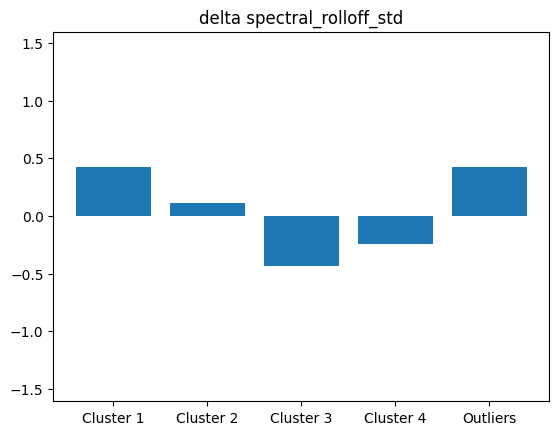

[-0.2834146099598607, 0.13020714582102533, 0.13043717056811585, -0.11269931551730164, 2.5098371475481103]


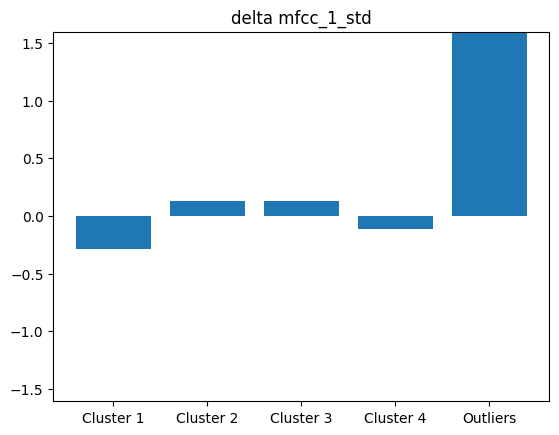

[-0.16112648170440647, 0.4735780546932788, -0.2408480687324026, 0.10011957844972758, 1.4214403221325607]


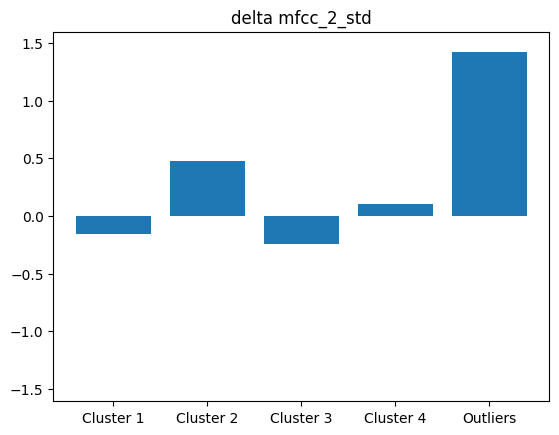

[-0.2208399964847737, 0.737806347705427, -0.2901323890884399, 0.030479332859855997, 1.283998820720963]


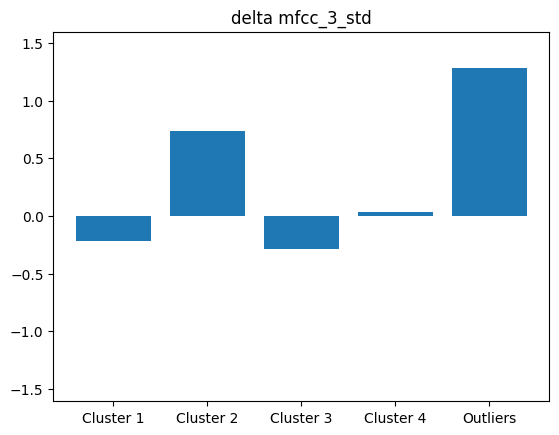

[-0.2914240765323949, 1.0457810485614156, -0.4551168694526402, 0.15034594625854616, 1.306395067685659]


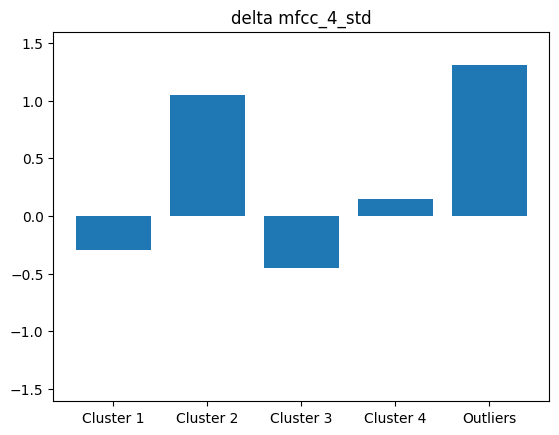

[-0.2507940646233526, 0.679927511425691, -0.4237475190003131, 0.39906929914822775, 1.6349047585883385]


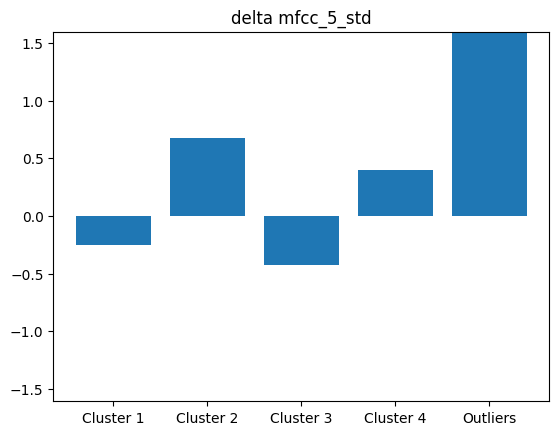

[-0.2717335888988928, 0.8257009132450089, -0.4371736956662156, 0.35299439530038695, 1.182397323842304]


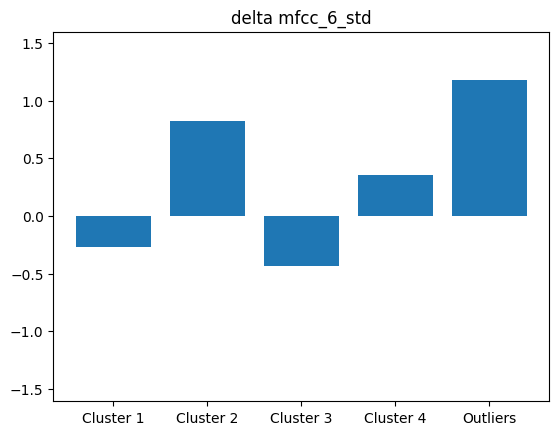

[-0.2687512509832457, 0.9670132143231006, -0.4964839907569312, 0.269001673654128, 1.402148763756912]


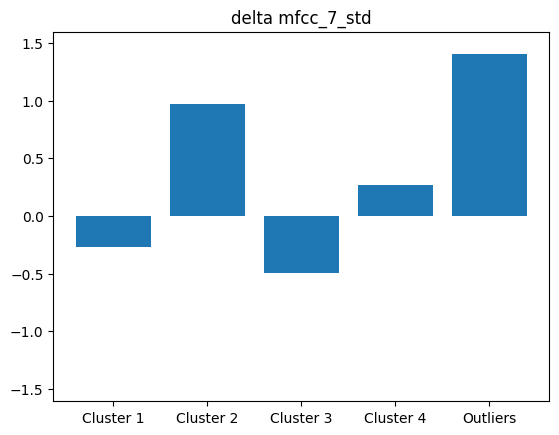

[-0.21778003294231665, 0.5663111693489786, -0.4136205444686873, 0.49126227544167295, 1.2515656732513063]


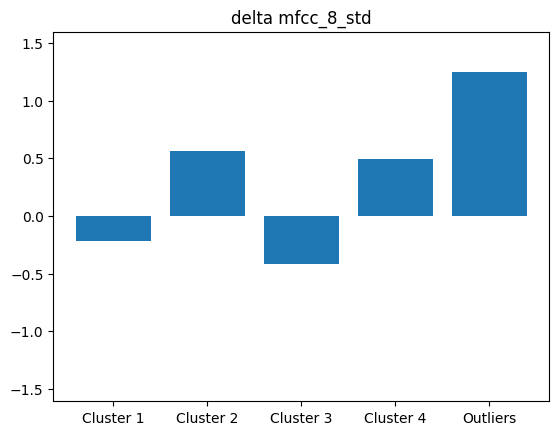

[-0.19142146002281446, 0.5427040691940049, -0.41181743680627536, 0.4938467703694717, 0.9637568799533703]


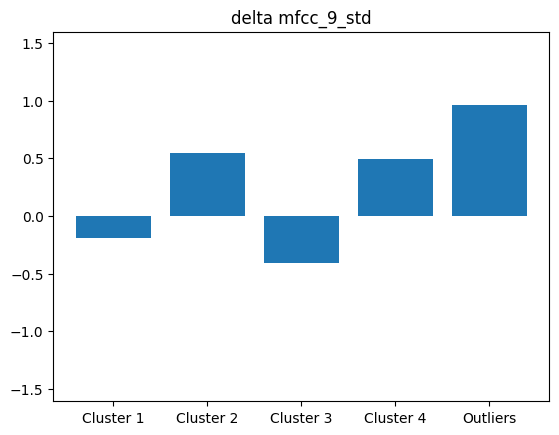

[-0.19593952924669122, 0.4989638261314146, -0.381667125450996, 0.4725295458497917, 1.1416569383087238]


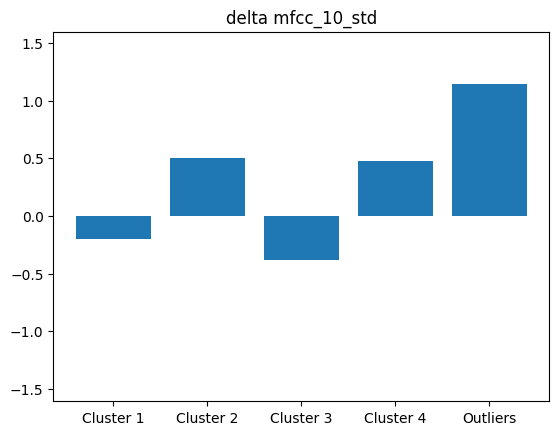

[-0.16325093117583048, 0.3178793236162003, -0.33451693962028534, 0.5456856052786102, 0.9607003939405487]


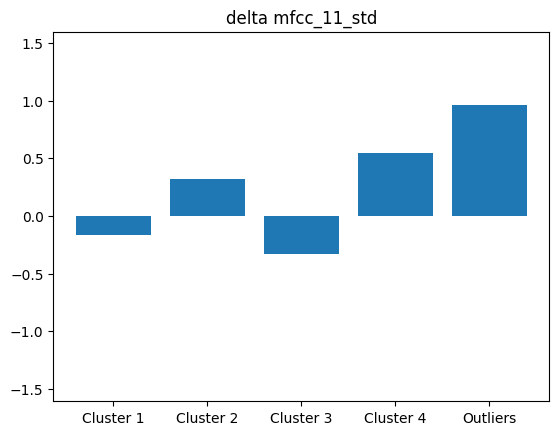

[-0.16480127896629146, 0.31236670583248255, -0.28188828176933795, 0.4528669181433198, 0.91633192699108]


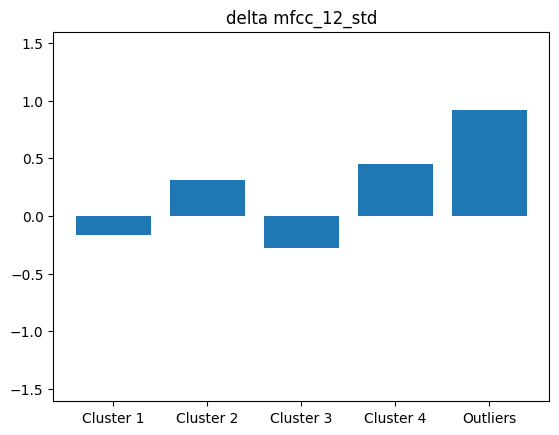

[-0.11394389061578639, 0.26062522317098175, -0.2711708515057979, 0.4577671952780917, 0.30303489223716246]


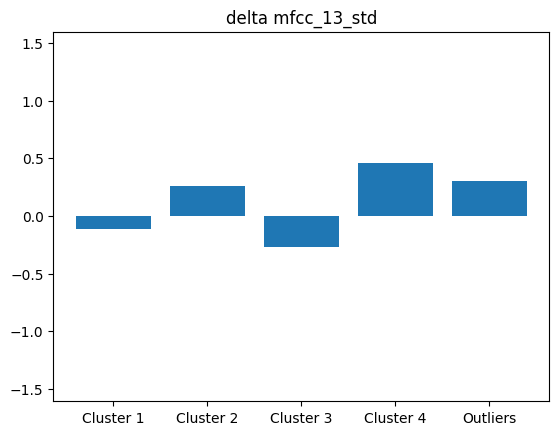

[-0.16139358020375968, -0.10340801850449126, -0.598775195901426, 1.595437851820176, 0.9931629322336009]


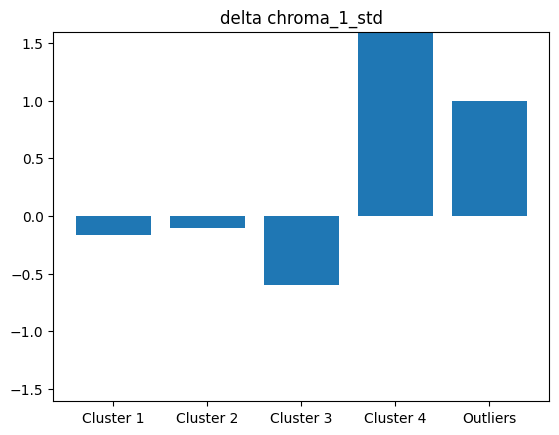

[-0.19224754285373616, 0.11415127198130588, -0.6558064231835871, 1.5099183183225295, 1.049261327765607]


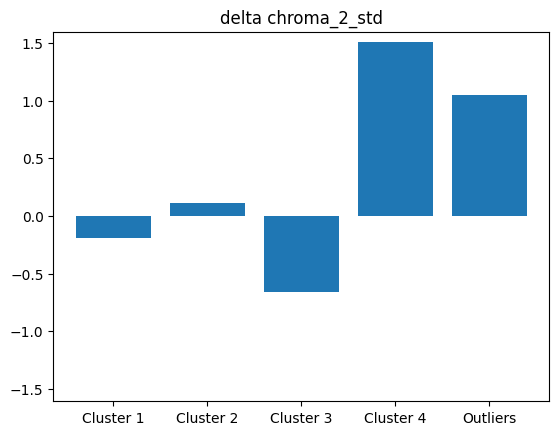

[-0.6810435071267723, -0.4787827668009742, 1.2970885844799565, -0.5117315536433277, -0.51231699135486]


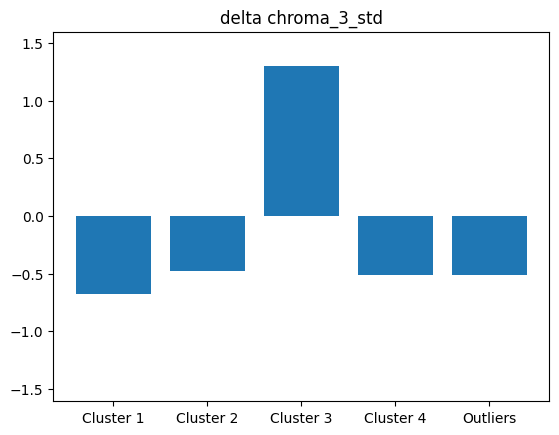

[-0.2162587203209751, 1.1229384132897586, -0.7352350433423926, 0.6190411260827602, 0.09933238061076798]


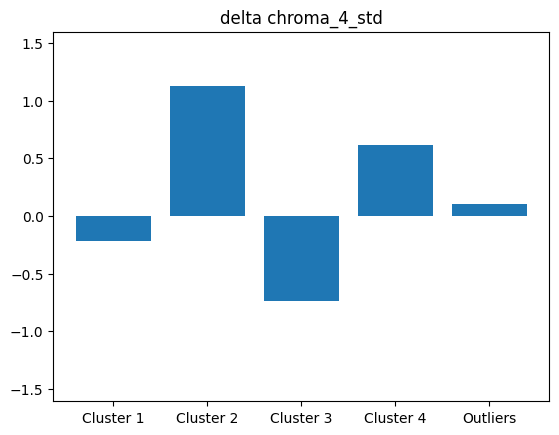

[-0.3702648815334577, 0.9051867876842112, -0.23737194479159715, 0.1568498875343429, 0.4416954062731666]


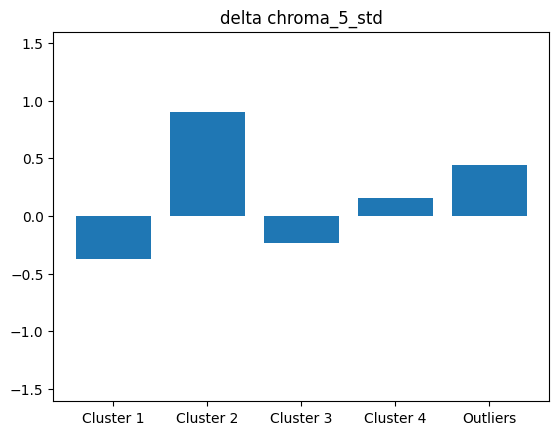

[-0.25366022647533754, 1.230795129231769, -0.7019872268990118, 0.4891122710585054, 0.2052561857151553]


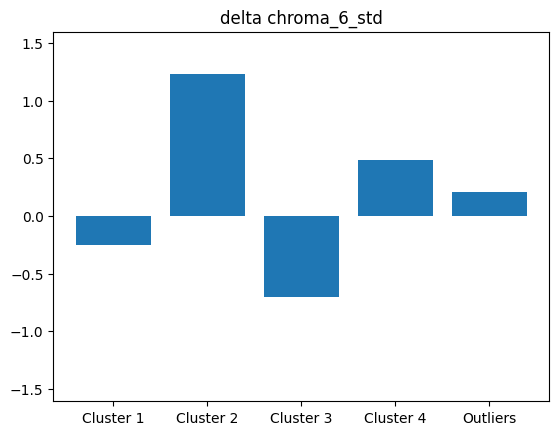

[-0.6771992587171002, -0.5062119469490479, 1.3380771540781846, -0.5872203476842828, -0.3873149539733262]


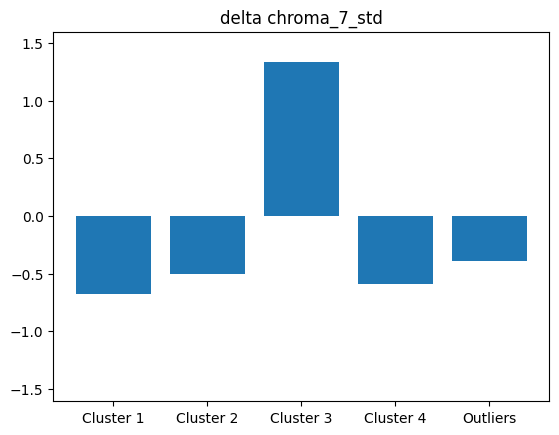

[0.03062227783597894, 0.9267968835217093, -0.6086899302308528, 0.054378223822856335, 0.03981016583347058]


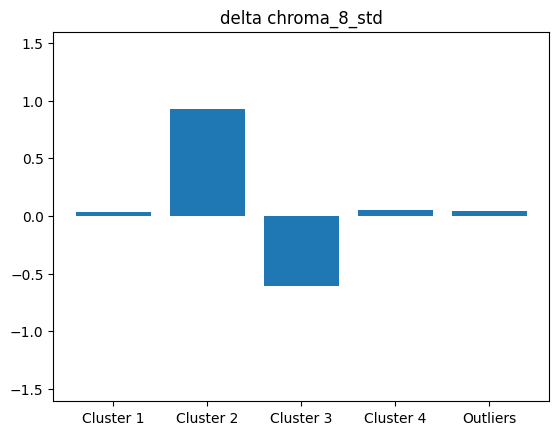

[-0.11463979224850294, -0.007902163063199345, -0.653422908597875, 1.4891734099636544, 0.982210010076329]


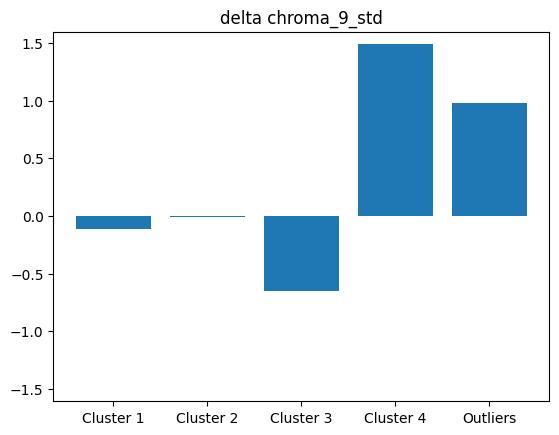

[-0.19262857760134544, -0.17938929007188054, -0.49514062488265115, 1.5448107838675647, 0.9842888593847853]


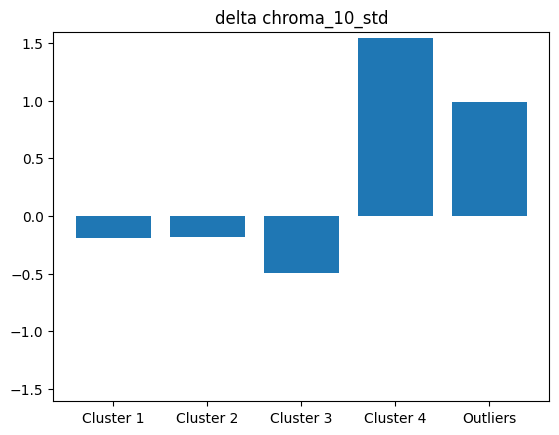

[-0.49740389260082335, -0.5301409909583588, 0.49001351366014606, 0.6981644575759594, 0.349564950194939]


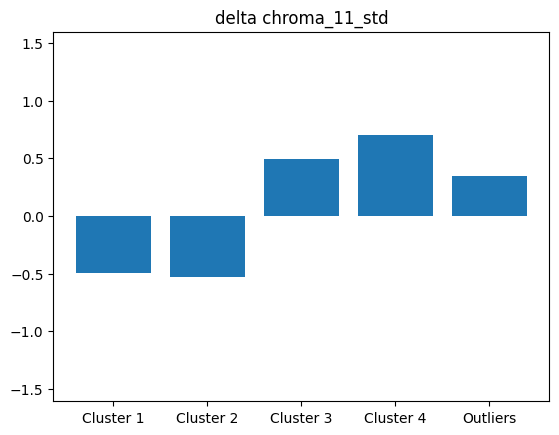

[-0.1833014126741827, -0.12712216598527515, -0.5890570460262352, 1.6499966102332242, 1.0173746886923867]


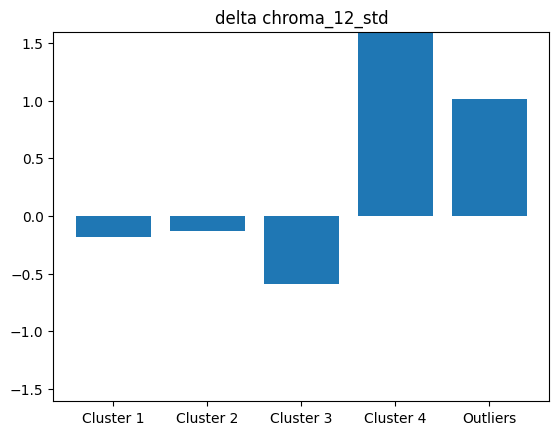

[-0.81418518137808, -0.31061791437653985, 1.2505904105916936, -0.36943474241885654, -0.15159307045203219]


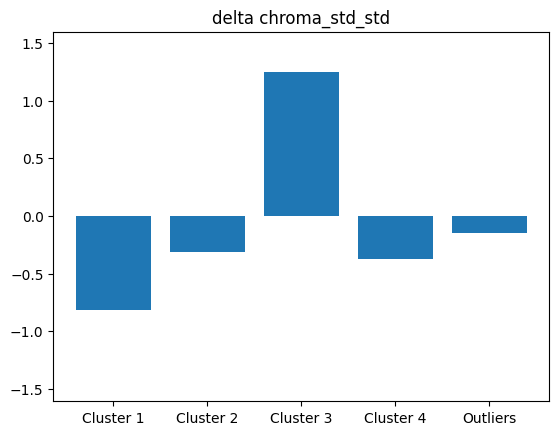

[-0.09049320422731627, 4.8025833703601535, -5.543145052990412, 5.077144407557164, 5.665665099947832]


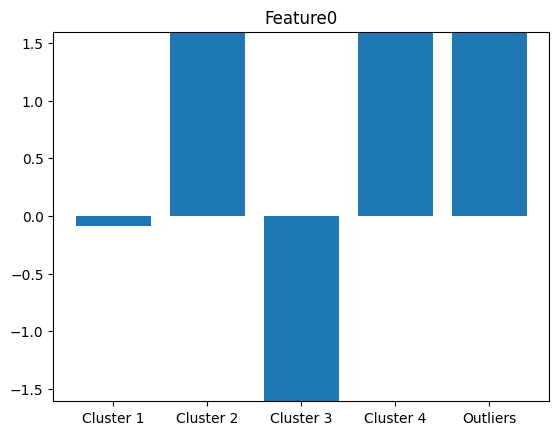

[-4.15939843293612, 1.409651663998981, 2.931563149934744, 0.9988493817361483, 3.976539978318924]


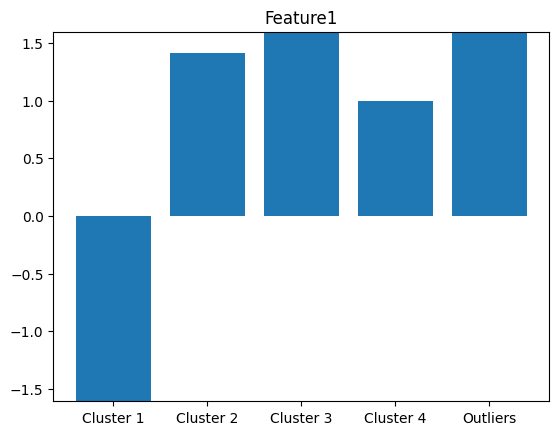

[0.2136399454422492, 3.0505342411013396, 0.21307279965324527, -4.862419249639598, 1.8548113824567976]


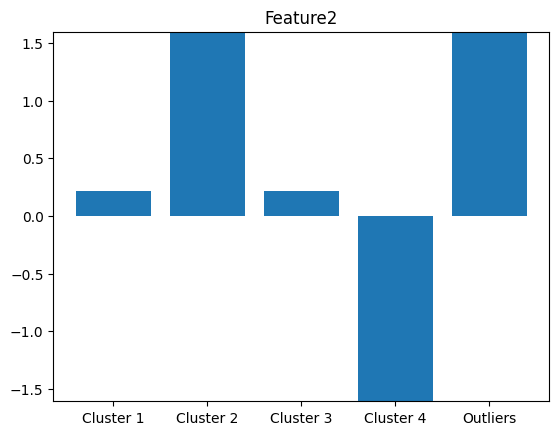

[-0.4156125961283923, 2.57917928832057, -0.5373540326652385, -0.8459779577194638, -2.0573257353483427]


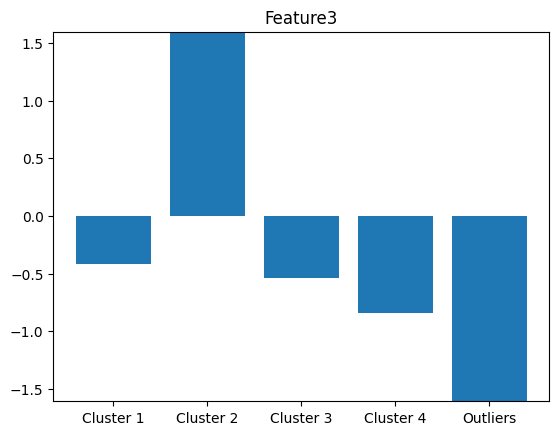

[0.250528366568838, -1.155416737887389, -0.23049731742600627, 0.7743062575395092, 4.361161564329238]


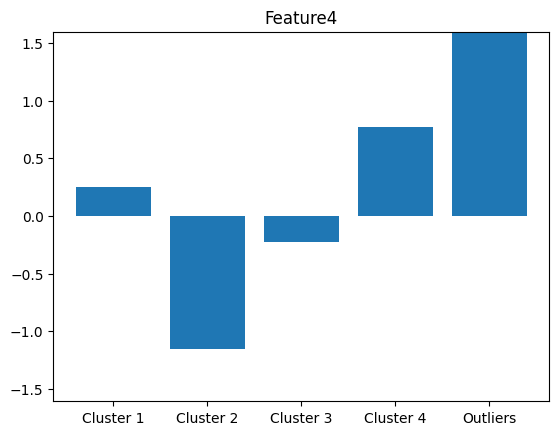

[-0.02260715513159663, 0.13377684672165252, 0.07713561803415045, -0.05620802803225199, -1.709132422144655]


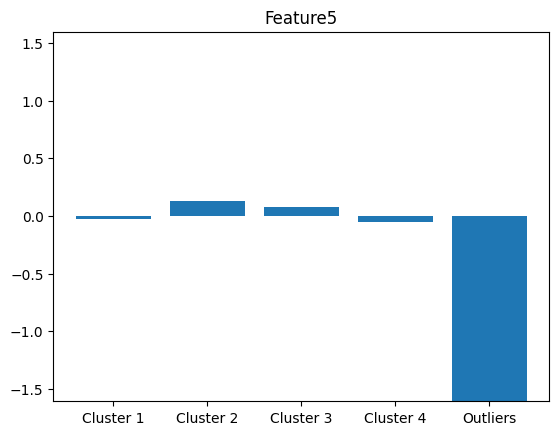

[0.20993508055434973, -0.6176681520834248, 0.019297524423666838, 0.1476011940585188, 0.7686311847949158]


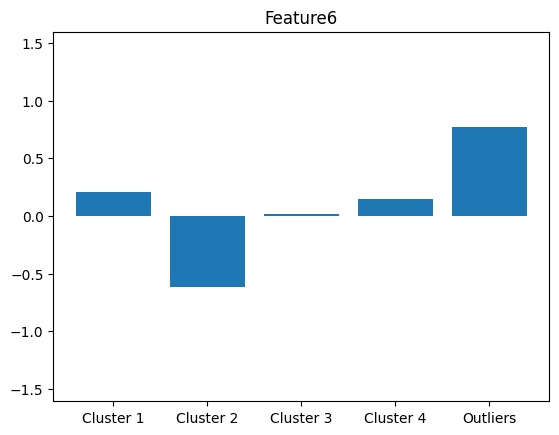

[-0.17976970150826255, 0.2846033340569344, -0.052149097051723624, 0.10085354717842425, 0.4814559172573843]


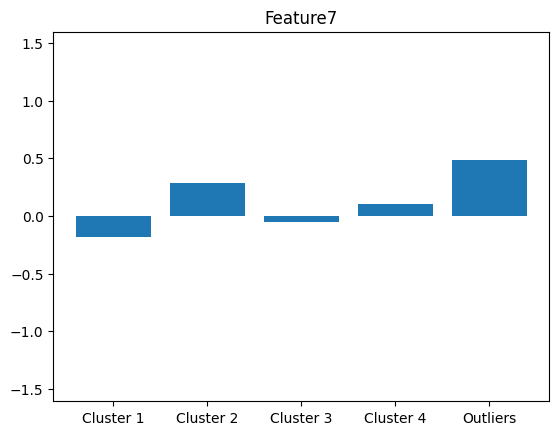

[0.07281983548774239, -0.15934636095956847, 0.05396540969171575, -0.16412897846358904, 0.6710525558070387]


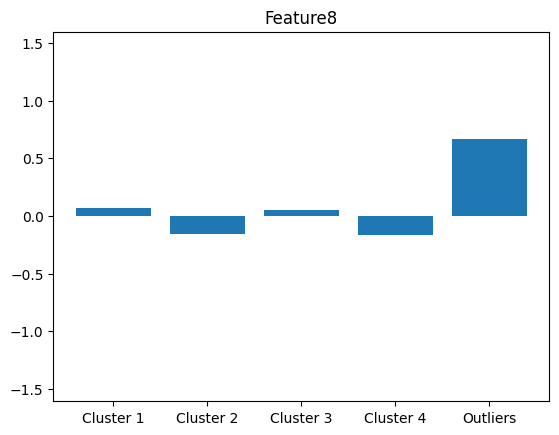

[-0.07709128794754797, 0.06767066201956569, 0.11655752778224325, -0.08881615322225615, -0.4944485575907159]


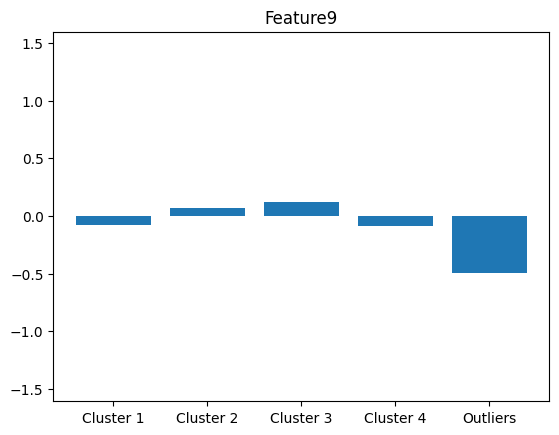

[0.12009039618244648, -0.18869575379559014, -0.03651872101810908, -0.025773196278790635, 0.502523783099684]


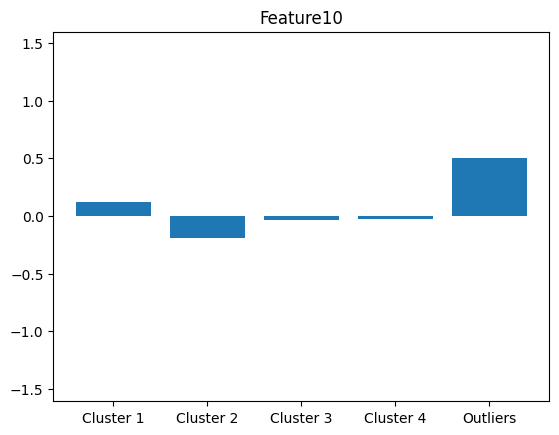

[0.2094140736207312, -0.24402504288202378, -0.06301646403467703, -0.12019388581162382, 0.6413246711356686]


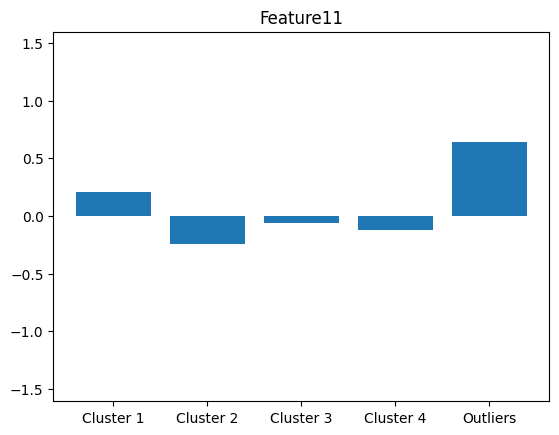

[-0.03506012018126089, 0.19687035186808563, -0.013779845081202708, -0.04879876212923311, -0.6690699476683927]


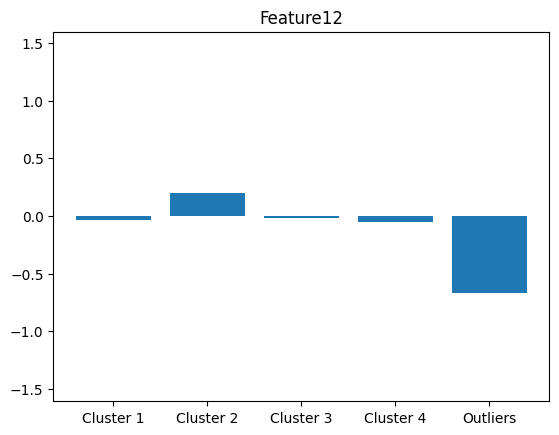

[0.0106778007166107, 0.04319319338502455, -0.04753432316575061, -0.04282466036493952, 0.5119983935688952]


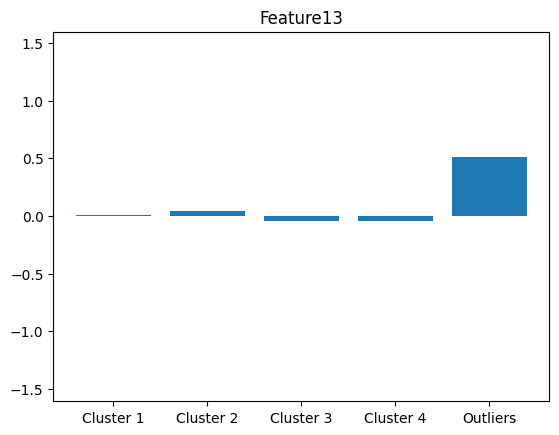

[-0.07290067187871864, -0.007931238980207742, 0.10919147754415086, -0.011288230738799072, -0.33289819980047614]


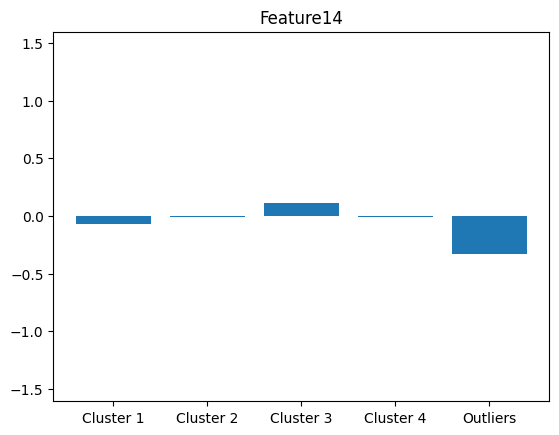

[0.13477962250458156, 0.0408915295189818, -0.14222367770912478, -0.10944044361460728, 0.41967666946281146]


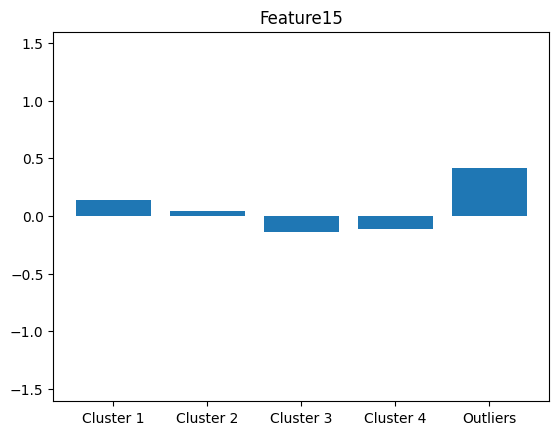

[-0.1457633289391192, -0.13291723346846768, 0.19756632337933883, 0.15189846374012547, -0.5795510498434316]


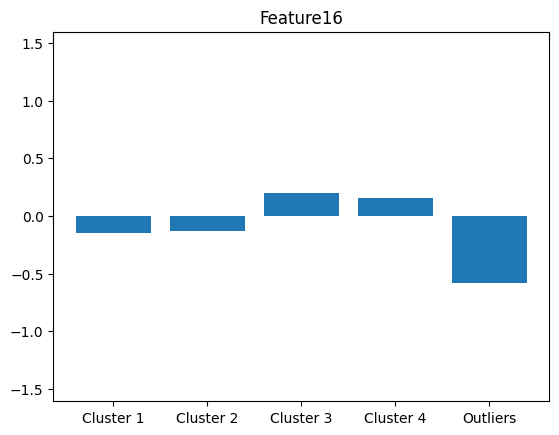

[0.08658038478308694, -0.09605252915479075, 0.03724205977928636, -0.10605047242991632, -0.3704682612402903]


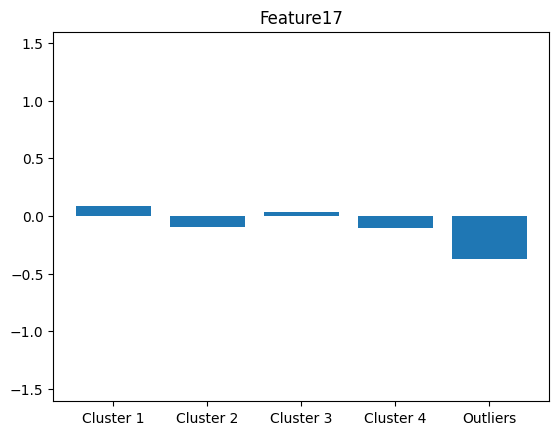

[0.042618713202564676, -0.014531784909665267, -0.006048083522147614, -0.01745274038052924, -0.3752997810044644]


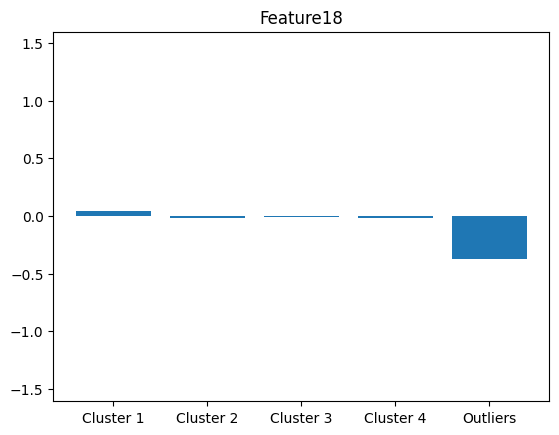

[-0.051876009839778144, 0.06554287356720456, -0.03327540334845333, 0.15549535080646595, -0.40536950992538434]


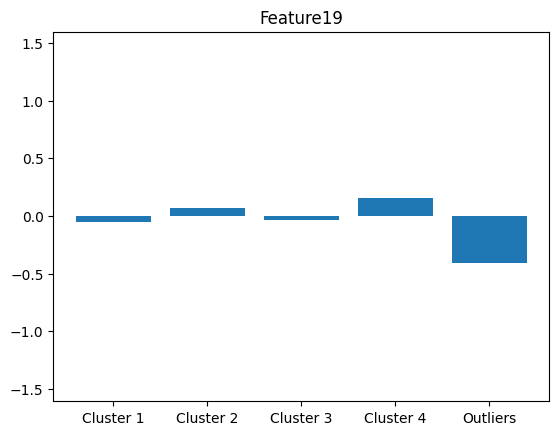

[-0.0928652867887078, 0.03377704968444082, 0.0014311546766097435, 0.09875828213577999, 0.5078174360957505]


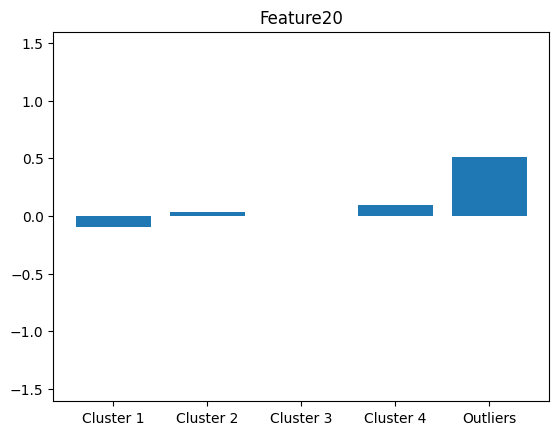

[0.1040663769858623, 0.020590856685516253, -0.004084751232888529, -0.24762983724652812, -0.006218561918580909]


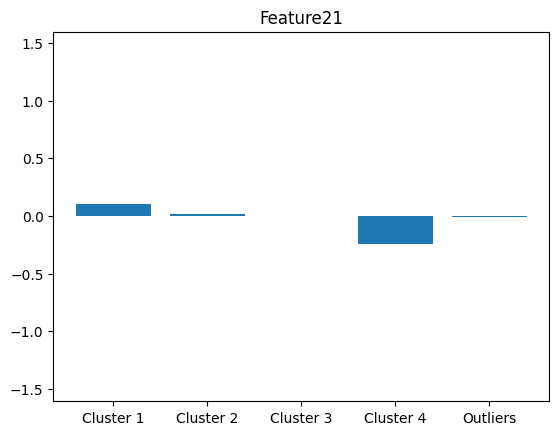

[-0.1077634587393126, 0.0026156566913036958, 0.013976527553683846, 0.16350071633603674, 0.353009221685093]


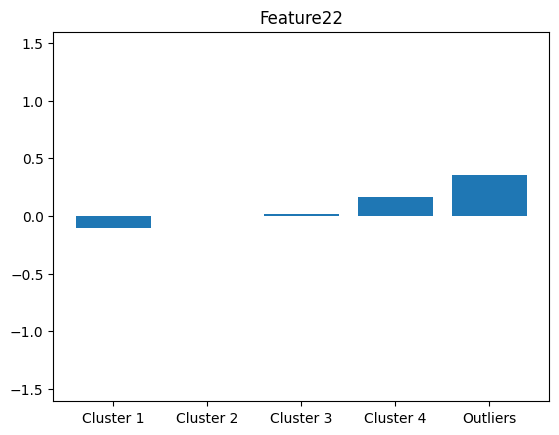

[-0.004339753604452431, 0.03378040896059254, -0.002438796358947978, -0.09153784808668701, 0.5166401839540561]


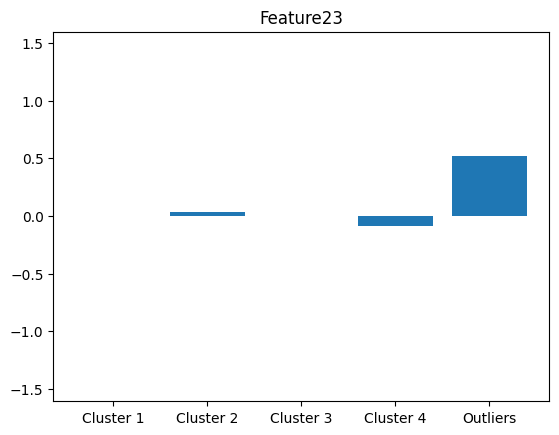

[0.00569004953455344, 0.007470159754809209, -0.003324978490635788, -0.06019980249668602, 0.3593673731962809]


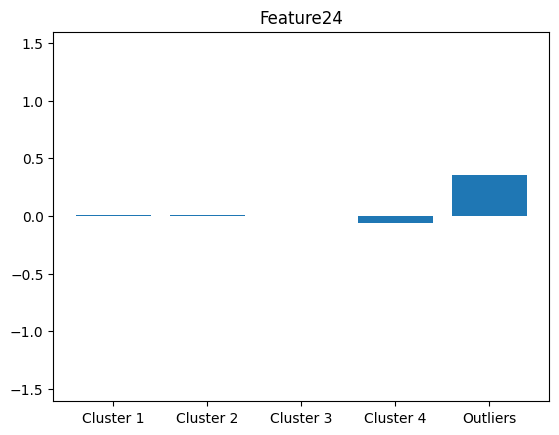

[-0.05754555658127851, 0.19446830125990713, -0.027344284139863173, -0.08321621425827606, 0.24657389515283268]


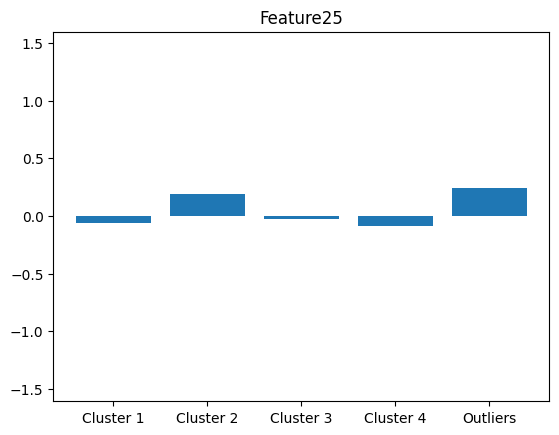

[-0.0608304439139861, 0.09836769313379068, -0.01201066973041399, 0.016370980553888217, 0.191618043248965]


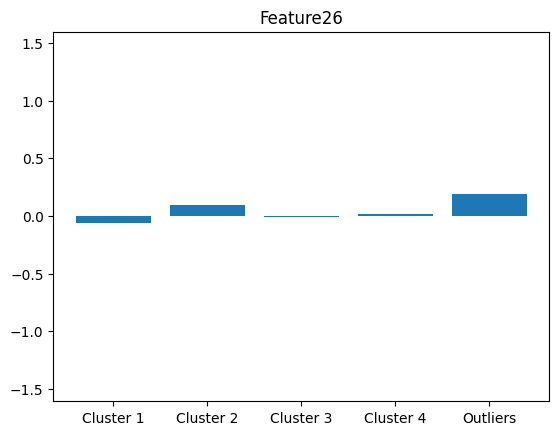

TypeError: Could not convert Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1Cluster 1 to numeric

In [122]:
v = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Outliers']

for co in final_df.columns:
    res = []
    for v_1 in v:
        out = final_df[final_df['infered_cluster'] == v_1][co].mean()
        res.append(out)

    print(res)
    plt.bar(v, res)

    # Set the y-axis limits to include all data points
    plt.ylim(min(y)-1, max(y)+1)
    plt.title(co)
    # Show the plot
    plt.show()

In [ ]:
# x = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Outliers']
# y = [-0.6081559106208841, 0.001864533277338454, 0.5985829806410361, 0.1187798528152378, -0.011534981930998322]

# # Create a bar plot
